# 1. Loading libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor,StackingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor   

from xgboost import XGBRFRegressor,XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from mypipes import *

import warnings
warnings.filterwarnings('ignore') # ignore the warnings.

import seaborn as sb
import matplotlib.pyplot as plt
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
def Threshold_Finder(Y_test,Y_predict):
    I = []
    roc_ = []
    for i in np.linspace(0.01,1,1000):
        Y_predict = Y_predict_prob[:,1] > i
        roc = roc_auc_score(Y_test,Y_predict)
        I.append(i)
        roc_.append(roc)
    Temp = I[roc_.index(max(roc_))]
    return Temp

# 2. Loading the datasets

In [2]:
# Load the data frame
train_file = r'D:\NIKHILESH\ML_AI\Decision Trees, Random Forests and Extra Trees\loan_data_train.csv'
test_file = r'D:\NIKHILESH\ML_AI\Decision Trees, Random Forests and Extra Trees\loan_data_test.csv'
ld_train = pd.read_csv(train_file)
ld_test = pd.read_csv(test_file)

# 3. Basic data exploration

In [3]:
# overview of data
ld_train.head(10)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
5,32737.0,5400,5375,8.90%,36 months,small_business,6.27%,OH,RENT,3000.00,785-789,2,90,2.0,NaN
6,71685.0,16000,16000,22.47%,60 months,credit_card,11.27%,CA,RENT,4791.67,665-669,5,8474,0.0,2 years
7,38028.0,6400,6400,7.51%,36 months,major_purchase,9.58%,IL,RENT,6400.00,735-739,11,12306,1.0,< 1 year
8,32119.0,24000,23772.15,12.99%,60 months,home_improvement,15.54%,NC,MORTGAGE,8333.33,740-744,24,56984,0.0,NaN
9,84563.0,8000,8000,7.62%,36 months,other,0%,NC,MORTGAGE,3500.00,765-769,7,0,1.0,NaN


In [4]:
# get to know data type
ld_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

# 4. Build data processing pipelines
# step to transfrom the data 
step 1  divied the data into sub data

step 2 notedown the step to transform 

step 3 design the class for each tranformatoin using sklearn.Base 

step 4 write the pipeline 

step 5 make feature union 

step 6 fit the data from train data 

step 7 transform the train and test data


In [5]:
# step 1 and step 2
# string to numaric data transfrom Amount.Requested ,Amount.Funded.By.Investors,Open.CREDIT.Lines,Revolving.CREDIT.Balance(p1)
# data cleaning drop '%' and convert to numaric Debt.To.Income.Ratio(p2)
# data cleaning  for Fico.range drop '-' and take mean FICO.Range(p3)
# convert the tags data in to numaric by get dummy Loan.Length, Loan.Purpose, Home.Ownership,Employment.Length(p4)
#convert the tags data in to numaric by get dummy by freq > 20  State(p5)


In [6]:
# step 3 
from mypipes import *

In [7]:
# step 4 
p1 = pdPipeline([
    ('columns_selection',VarSelector(['Amount.Requested','Amount.Funded.By.Investors','Open.CREDIT.Lines','Revolving.CREDIT.Balance'])),
    ('str_to_num',convert_to_numeric()),
    ('data_impute',DataFrameImputer())    
])

p2 = pdPipeline([
    ('columns_selection',VarSelector(['Debt.To.Income.Ratio'])),
    ('data_clean',string_clean('%')),
    ('str_to_num',convert_to_numeric()),
    ('data_impute',DataFrameImputer())
])

p3 = pdPipeline([
    ('columns_selection',VarSelector(['FICO.Range'])),
    ('mean_of_fico_range',custom_fico()),
    ('data_impute',DataFrameImputer())     
])

p4 = pdPipeline([
    ('columns_selection',VarSelector(['Loan.Length','Loan.Purpose','Home.Ownership','Employment.Length'])),
    ('data_impute',DataFrameImputer()),
    ('get_dummy',get_dummies_Pipe())
    
    
])
p5 = pdPipeline([
    ('columns_selection',VarSelector(['State'])),
    ('data_impute',DataFrameImputer()),
    ('get_dummy',get_dummies_Pipe(20))
    
    
])


In [8]:
union_pipe = FeatureUnion([
    ('string_to_numaric',p1),
    ('data_cleaning',p2),
    ('data_cleaning_for_Fico.range',p3),
    ('create_dummy',p4),
    ('create_dummy_with_fillter_limit',p5)    
])


In [9]:
union_pipe.fit(ld_train)

FeatureUnion(transformer_list=[('string_to_numaric',
                                pdPipeline(steps=[('columns_selection',
                                                   VarSelector(feature_names=['Amount.Requested',
                                                                              'Amount.Funded.By.Investors',
                                                                              'Open.CREDIT.Lines',
                                                                              'Revolving.CREDIT.Balance'])),
                                                  ('str_to_num',
                                                   convert_to_numeric()),
                                                  ('data_impute',
                                                   DataFrameImputer())])),
                               ('data_cleaning',
                                pdPipeline(steps=[('columns_selection',
                                                   VarS...
 

In [10]:
union_pipe.transform(ld_train)

array([[2.5000e+04, 2.5000e+04, 1.1000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9750e+04, 1.9750e+04, 1.4000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.1000e+03, 2.1000e+03, 1.3000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9800e+04, 1.9775e+04, 1.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.8000e+04, 1.8000e+04, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.5500e+03, 7.5500e+03, 1.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

# 5. Create model ready x_train and x_test

In [11]:
x_ld_train = pd.DataFrame(data = union_pipe.transform(ld_train) , columns = union_pipe.get_feature_names())
x_ld_train.rename(columns = {'create_dummy__Employment.Length_< 1 year':'create dummy__Employment.Length_lessthan_1_year'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Loan.Length_36 months':'create_dummy__Loan.Length_36_months'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Loan.Length_60 months':'create_dummy__Loan.Length_60_months'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_2 years':'create_dummy__Employment.Length_2_years'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_3 years':'create_dummy__Employment.Length_3_years'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_4 years':'create_dummy__Employment.Length_4_years'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_5 years':'create_dummy__Employment.Length_5_years'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_5 years':'create_dummy__Employment.Length_5_years'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_6 years':'create_dummy__Employment.Length_6_years'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_7 years':'create_dummy__Employment.Length_7_years'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_8 years':'create_dummy__Employment.Length_8_years'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_9 years':'create_dummy__Employment.Length_9_years'},inplace = True)
x_ld_train.rename(columns = {'create_dummy__Employment.Length_10+ years':'create_dummy__Employment.Length_10+_years'},inplace = True)
x_ld_train

,string_to_numaric__Amount.Requested,string_to_numaric__Amount.Funded.By.Investors,string_to_numaric__Open.CREDIT.Lines,string_to_numaric__Revolving.CREDIT.Balance,data_cleaning__Debt.To.Income.Ratio,data_cleaning_for_Fico.range__fico,create_dummy__Loan.Length_36_months,create_dummy__Loan.Length_60_months,create_dummy__Loan.Purpose_debt_consolidation,create_dummy__Loan.Purpose_credit_card,...,create_dummy_with_fillter_limit__State_AZ,create_dummy_with_fillter_limit__State_MI,create_dummy_with_fillter_limit__State_AL,create_dummy_with_fillter_limit__State_MN,create_dummy_with_fillter_limit__State_NV,create_dummy_with_fillter_limit__State_MO,create_dummy_with_fillter_limit__State_SC,create_dummy_with_fillter_limit__State_OR,create_dummy_with_fillter_limit__State_WI,create_dummy_with_fillter_limit__State_KS
0,25000.0,25000.00,11.0,15210.0,27.56,722.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19750.0,19750.00,14.0,19070.0,13.39,712.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2100.0,2100.00,13.0,893.0,3.50,692.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28000.0,28000.00,12.0,38194.0,19.62,712.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,24250.0,17431.82,6.0,31061.0,23.79,732.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,16.0,17969.0,12.10,677.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2196,4200.0,4200.00,4.0,5718.0,14.16,702.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2197,19800.0,19775.00,10.0,46879.0,15.03,677.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,18000.0,18000.00,5.0,32394.0,11.63,672.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
x_ld_test = pd.DataFrame(data = union_pipe.transform(ld_test) , columns = union_pipe.get_feature_names())
x_ld_test

,string_to_numaric__Amount.Requested,string_to_numaric__Amount.Funded.By.Investors,string_to_numaric__Open.CREDIT.Lines,string_to_numaric__Revolving.CREDIT.Balance,data_cleaning__Debt.To.Income.Ratio,data_cleaning_for_Fico.range__fico,create_dummy__Loan.Length_36 months,create_dummy__Loan.Length_60 months,create_dummy__Loan.Purpose_debt_consolidation,create_dummy__Loan.Purpose_credit_card,...,create_dummy_with_fillter_limit__State_AZ,create_dummy_with_fillter_limit__State_MI,create_dummy_with_fillter_limit__State_AL,create_dummy_with_fillter_limit__State_MN,create_dummy_with_fillter_limit__State_NV,create_dummy_with_fillter_limit__State_MO,create_dummy_with_fillter_limit__State_SC,create_dummy_with_fillter_limit__State_OR,create_dummy_with_fillter_limit__State_WI,create_dummy_with_fillter_limit__State_KS
0,5000.0,5000.0,13.0,7686.0,12.59,692.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18000.0,18000.0,6.0,11596.0,4.93,712.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7200.0,7200.0,13.0,7283.0,25.16,752.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,7200.0,14.0,4838.0,17.27,792.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22000.0,22000.0,9.0,20181.0,18.28,722.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,12000.0,11975.0,7.0,3923.0,13.91,707.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
296,5000.0,5000.0,10.0,6023.0,17.22,707.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,4375.0,4375.0,9.0,6944.0,9.09,672.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,13600.0,13600.0,13.0,24383.0,12.85,677.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x_ld_test.rename(columns = {'create_dummy__Employment.Length_< 1 year':'create dummy__Employment.Length_lessthan_1_year'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Loan.Length_36 months':'create_dummy__Loan.Length_36_months'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Loan.Length_60 months':'create_dummy__Loan.Length_60_months'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_2 years':'create_dummy__Employment.Length_2_years'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_3 years':'create_dummy__Employment.Length_3_years'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_4 years':'create_dummy__Employment.Length_4_years'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_5 years':'create_dummy__Employment.Length_5_years'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_5 years':'create_dummy__Employment.Length_5_years'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_6 years':'create_dummy__Employment.Length_6_years'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_7 years':'create_dummy__Employment.Length_7_years'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_8 years':'create_dummy__Employment.Length_8_years'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_9 years':'create_dummy__Employment.Length_9_years'},inplace = True)
x_ld_test.rename(columns = {'create_dummy__Employment.Length_10+ years':'create_dummy__Employment.Length_10+_years'},inplace = True)
x_ld_test.info()# every data is in numaric form 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 62 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   string_to_numaric__Amount.Requested              300 non-null    float64
 1   string_to_numaric__Amount.Funded.By.Investors    300 non-null    float64
 2   string_to_numaric__Open.CREDIT.Lines             300 non-null    float64
 3   string_to_numaric__Revolving.CREDIT.Balance      300 non-null    float64
 4   data_cleaning__Debt.To.Income.Ratio              300 non-null    float64
 5   data_cleaning_for_Fico.range__fico               300 non-null    float64
 6   create_dummy__Loan.Length_36_months              300 non-null    float64
 7   create_dummy__Loan.Length_60_months              300 non-null    float64
 8   create_dummy__Loan.Purpose_debt_consolidation    300 non-null    float64
 9   create_dummy__Loan.Purpose_credi

# 6. Create y_train

In [14]:
# same to output data(intrest.rate)

p6 = pdPipeline([
    ('columns_selection',VarSelector(['Interest.Rate'])),
    ('data_clean',string_clean('%')),
    ('str_to_num',convert_to_numeric()),
    ('data_impute',DataFrameImputer())
])

p6.fit(ld_train)

pdPipeline(steps=[('columns_selection',
                   VarSelector(feature_names=['Interest.Rate'])),
                  ('data_clean', string_clean(replace_it='%')),
                  ('str_to_num', convert_to_numeric()),
                  ('data_impute', DataFrameImputer())])

In [15]:
y_ld_train = pd.DataFrame(data = p6.transform(ld_train) , columns = p6.get_feature_names())
y_ld_train

,Interest.Rate
0,18.49
1,17.27
2,14.33
3,16.29
4,12.23
...,...
2195,23.28
2196,14.33
2197,15.31
2198,20.99


In [16]:
y_ld_train.info()  # every data is in numaric form 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest.Rate  2200 non-null   float64
dtypes: float64(1)
memory usage: 17.3 KB


# 7. Create train_test_spit (for 1 time validation)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(x_ld_train, y_ld_train, test_size=0.2, random_state=1)

In [18]:
Y_test.shape

(440, 1)

# 8. Fine a general model (default hyper parameter setting)

In [19]:
Lm_1 = LinearRegression()
Lm_1.fit(X_train,Y_train)

LinearRegression()

In [20]:
Y_predict = Lm_1.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [21]:
mean_absolute_error(Y_test,Y_predict)

1.6606888246379443

In [22]:
mean_squared_error(Y_test,Y_predict)

4.457076600765722

In [23]:
r2_score(Y_test,Y_predict)

0.7459451419481957

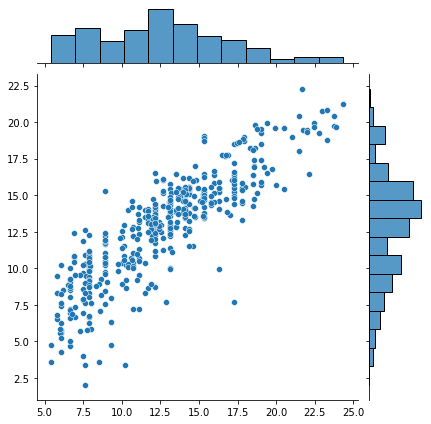

In [24]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

# 9. Hyper parameter with Cross validation (select best hyper parameter settings with multifold validations)

# A. Linear Regression - Lasso

In [25]:
alpha = np.linspace(0.01,100,100)
param_grid = {'alpha':alpha}

Lm_2 = Lasso()

random_search = RandomizedSearchCV(Lm_2,
                                   param_distributions = param_grid,
                                   n_iter = 25,
                                   cv = 5,
                                   scoring = 'r2' )

In [26]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=25,
                   param_distributions={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2....
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
                   scoring='r2')

In [27]:
random_search.best_estimator_

Lasso(alpha=2.03)

In [28]:
alpha = np.linspace(0.001,0.02,100)
param_grid = {'alpha':alpha}

Lm_2 = Lasso()

random_search = RandomizedSearchCV(Lm_2,
                                   param_distributions = param_grid,
                                   n_iter = 25,
                                   cv = 5,
                                   scoring = 'r2' )

In [29]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=25,
                   param_distributions={'alpha': array([0.001     , 0.00119192, 0.00138384, 0.00157576, 0.00176768,
       0.0019596 , 0.00215152, 0.00234343, 0.00253535, 0.00272727,
       0.00291919, 0.00311111, 0.00330303, 0.00349495, 0.00368687,
       0.00387879, 0.00407071, 0.00426263, 0.00445455, 0.00464646,
       0.00483838, 0.0050303 , 0.00522222, 0.00541414, 0.005...
       0.01347475, 0.01366667, 0.01385859, 0.01405051, 0.01424242,
       0.01443434, 0.01462626, 0.01481818, 0.0150101 , 0.01520202,
       0.01539394, 0.01558586, 0.01577778, 0.0159697 , 0.01616162,
       0.01635354, 0.01654545, 0.01673737, 0.01692929, 0.01712121,
       0.01731313, 0.01750505, 0.01769697, 0.01788889, 0.01808081,
       0.01827273, 0.01846465, 0.01865657, 0.01884848, 0.0190404 ,
       0.01923232, 0.01942424, 0.01961616, 0.01980808, 0.02      ])},
                   scoring='r2')

In [30]:
random_search.best_estimator_

Lasso(alpha=0.011363636363636364)

In [31]:
alpha = np.linspace(0.001,0.02,50)
param_grid = {'alpha':alpha}

Lm_2 = Lasso()

grid_search = GridSearchCV(Lm_2,
                                   param_grid = param_grid,
                                  
                                   cv = 5,
                                       scoring = 'neg_mean_absolute_error' )


In [32]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.001     , 0.00138776, 0.00177551, 0.00216327, 0.00255102,
       0.00293878, 0.00332653, 0.00371429, 0.00410204, 0.0044898 ,
       0.00487755, 0.00526531, 0.00565306, 0.00604082, 0.00642857,
       0.00681633, 0.00720408, 0.00759184, 0.00797959, 0.00836735,
       0.0087551 , 0.00914286, 0.00953061, 0.00991837, 0.01030612,
       0.01069388, 0.01108163, 0.01146939, 0.01185714, 0.0122449 ,
       0.01263265, 0.01302041, 0.01340816, 0.01379592, 0.01418367,
       0.01457143, 0.01495918, 0.01534694, 0.01573469, 0.01612245,
       0.0165102 , 0.01689796, 0.01728571, 0.01767347, 0.01806122,
       0.01844898, 0.01883673, 0.01922449, 0.01961224, 0.02      ])},
             scoring='neg_mean_absolute_error')

In [33]:
Lasso_model = grid_search.best_estimator_

In [34]:
Lasso_model.fit(X_train,Y_train)
Y_predict = Lasso_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [35]:
mean_absolute_error(Y_test,Y_predict)

1.6300294150892665

In [36]:
mean_squared_error(Y_test,Y_predict)

4.384468005693453

In [37]:
r2_score(Y_test,Y_predict)

0.7500838561698129

In [38]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -1.655859 (std: 0.068737)
Parameters: {'alpha': 0.011469387755102041}

Model with rank: 2
Mean validation score: -1.655899 (std: 0.068723)
Parameters: {'alpha': 0.011857142857142858}

Model with rank: 3
Mean validation score: -1.655939 (std: 0.068789)
Parameters: {'alpha': 0.011081632653061224}

Model with rank: 4
Mean validation score: -1.656022 (std: 0.068691)
Parameters: {'alpha': 0.012244897959183675}

Model with rank: 5
Mean validation score: -1.656042 (std: 0.068828)
Parameters: {'alpha': 0.010693877551020407}



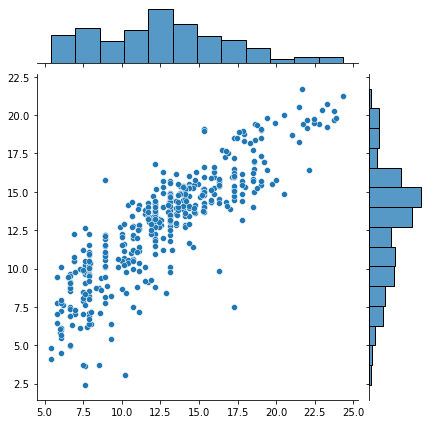

In [39]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

# B. Linear Regression - Ridge

In [40]:
alpha = np.linspace(43,46,100)
param_grid = {'alpha':alpha}

Lm_3 = Ridge()

grid_search = GridSearchCV(Lm_3,
                                   param_grid = param_grid,
                                   cv = 5,
                                   scoring = 'r2' )


In [41]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([43.        , 43.03030303, 43.06060606, 43.09090909, 43.12121212,
       43.15151515, 43.18181818, 43.21212121, 43.24242424, 43.27272727,
       43.3030303 , 43.33333333, 43.36363636, 43.39393939, 43.42424242,
       43.45454545, 43.48484848, 43.51515152, 43.54545455, 43.57575758,
       43.60606061, 43.63636364, 43.66666667, 43.6969697 , 43.727272...
       45.12121212, 45.15151515, 45.18181818, 45.21212121, 45.24242424,
       45.27272727, 45.3030303 , 45.33333333, 45.36363636, 45.39393939,
       45.42424242, 45.45454545, 45.48484848, 45.51515152, 45.54545455,
       45.57575758, 45.60606061, 45.63636364, 45.66666667, 45.6969697 ,
       45.72727273, 45.75757576, 45.78787879, 45.81818182, 45.84848485,
       45.87878788, 45.90909091, 45.93939394, 45.96969697, 46.        ])},
             scoring='r2')

In [42]:
grid_search.best_estimator_

Ridge(alpha=44.96969696969697)

In [43]:
Rigge_model = grid_search.best_estimator_
Rigge_model.fit(X_train,Y_train)

Ridge(alpha=44.96969696969697)

In [44]:
Y_predict = Rigge_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [45]:
mean_absolute_error(Y_test,Y_predict)

1.6495548597850693

In [46]:
mean_squared_error(Y_test,Y_predict)

4.414997951269437

In [47]:
r2_score(Y_test,Y_predict)

0.7483436390534404

In [48]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.740093 (std: 0.034419)
Parameters: {'alpha': 0.011363636363636364}

Model with rank: 2
Mean validation score: 0.740089 (std: 0.034424)
Parameters: {'alpha': 0.011555555555555555}

Model with rank: 3
Mean validation score: 0.740062 (std: 0.034423)
Parameters: {'alpha': 0.01193939393939394}

Model with rank: 4
Mean validation score: 0.740041 (std: 0.034409)
Parameters: {'alpha': 0.010404040404040405}

Model with rank: 5
Mean validation score: 0.740027 (std: 0.034406)
Parameters: {'alpha': 0.01021212121212121}



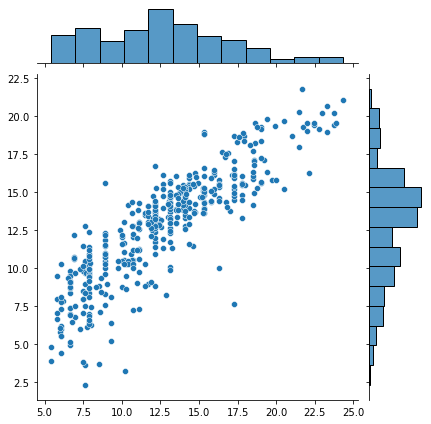

In [49]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

# C. Decision Tree

In [50]:
dtree_model = DecisionTreeRegressor()
dtree_model_cv_scores = cross_val_score(dtree_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
dtree_model_cv_scores.mean()

-7.417814659090908

In [51]:
dtree_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [52]:
Y_predict = dtree_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [53]:
mean_absolute_error(Y_test,Y_predict)

1.773522727272727

In [54]:
mean_squared_error(Y_test,Y_predict)

5.511683409090909

In [55]:
r2_score(Y_test,Y_predict)

0.6858322008909359

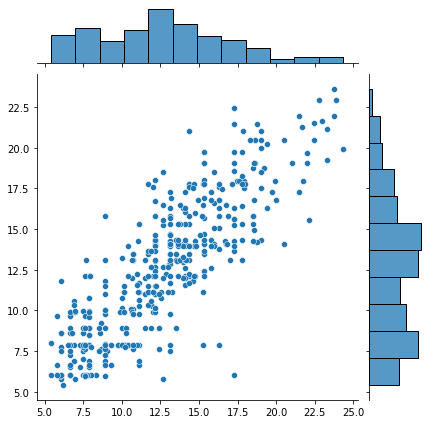

In [56]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## hyperparameter tuning

In [57]:
%%time
dtree_reg_model = DecisionTreeRegressor()

dtree_clf_params = {
    'splitter':['best', 'random'],
    'criterion':['mse','mae'],
    'max_depth':[None,5,10,15,20,30,50,70],
    'min_samples_leaf':[1,2,5,10,15,20], 
    'min_samples_split':[2,5,10,15,20]
}

dtree_reg_random_search = RandomizedSearchCV(dtree_reg_model,param_distributions=dtree_clf_params,
                                             cv = 5, n_iter=10,scoring='neg_mean_squared_error')

dtree_reg_random_search.fit(X_train,Y_train)

Wall time: 4.4 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [58]:
report(dtree_reg_random_search.cv_results_,3)

Model with rank: 1
Mean validation score: -4.723565 (std: 0.741617)
Parameters: {'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 15, 'criterion': 'mse'}

Model with rank: 2
Mean validation score: -4.744074 (std: 0.584472)
Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 30, 'criterion': 'mse'}

Model with rank: 3
Mean validation score: -4.868447 (std: 0.418364)
Parameters: {'splitter': 'random', 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_depth': 50, 'criterion': 'mse'}



In [59]:
dtree_reg = dtree_reg_random_search.best_estimator_

In [60]:
dtree_reg.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=10,
                      splitter='random')

In [61]:
Y_predict = dtree_reg.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [62]:
mean_absolute_error(Y_test,Y_predict)

1.5922324927423959

In [63]:
mean_squared_error(Y_test,Y_predict)

4.4361174321329395

In [64]:
r2_score(Y_test,Y_predict)

0.7471398215754138

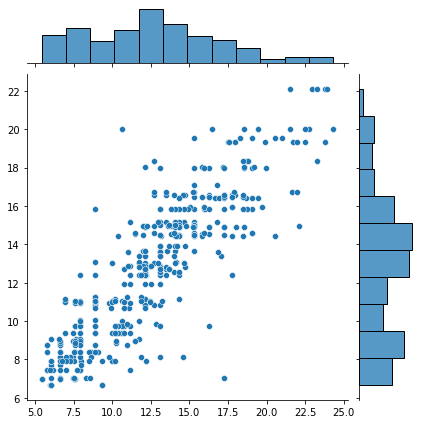

In [65]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

### visualise of decision tree

[Text(3437.8515625, 5226.923076923077, 'create_dummy__Loan.Length_60_months <= 0.34\nmse = 17.322\nsamples = 1760\nvalue = 13.155'),
 Text(1663.828125, 4808.7692307692305, 'data_cleaning_for_Fico.range__fico <= 666.015\nmse = 13.649\nsamples = 1371\nvalue = 12.224'),
 Text(828.28125, 4390.615384615385, 'data_cleaning__Debt.To.Income.Ratio <= 17.69\nmse = 6.37\nsamples = 79\nvalue = 17.304'),
 Text(750.78125, 3972.4615384615386, 'mse = 6.242\nsamples = 38\nvalue = 16.588'),
 Text(905.78125, 3972.4615384615386, 'mse = 5.571\nsamples = 41\nvalue = 17.969'),
 Text(2499.375, 4390.615384615385, 'data_cleaning_for_Fico.range__fico <= 719.792\nmse = 12.419\nsamples = 1292\nvalue = 11.913'),
 Text(1060.78125, 3972.4615384615386, 'data_cleaning_for_Fico.range__fico <= 672.332\nmse = 7.729\nsamples = 858\nvalue = 13.585'),
 Text(465.0, 3554.3076923076924, 'string_to_numaric__Amount.Requested <= 9544.737\nmse = 5.495\nsamples = 186\nvalue = 15.953'),
 Text(310.0, 3136.153846153846, 'create_dummy__

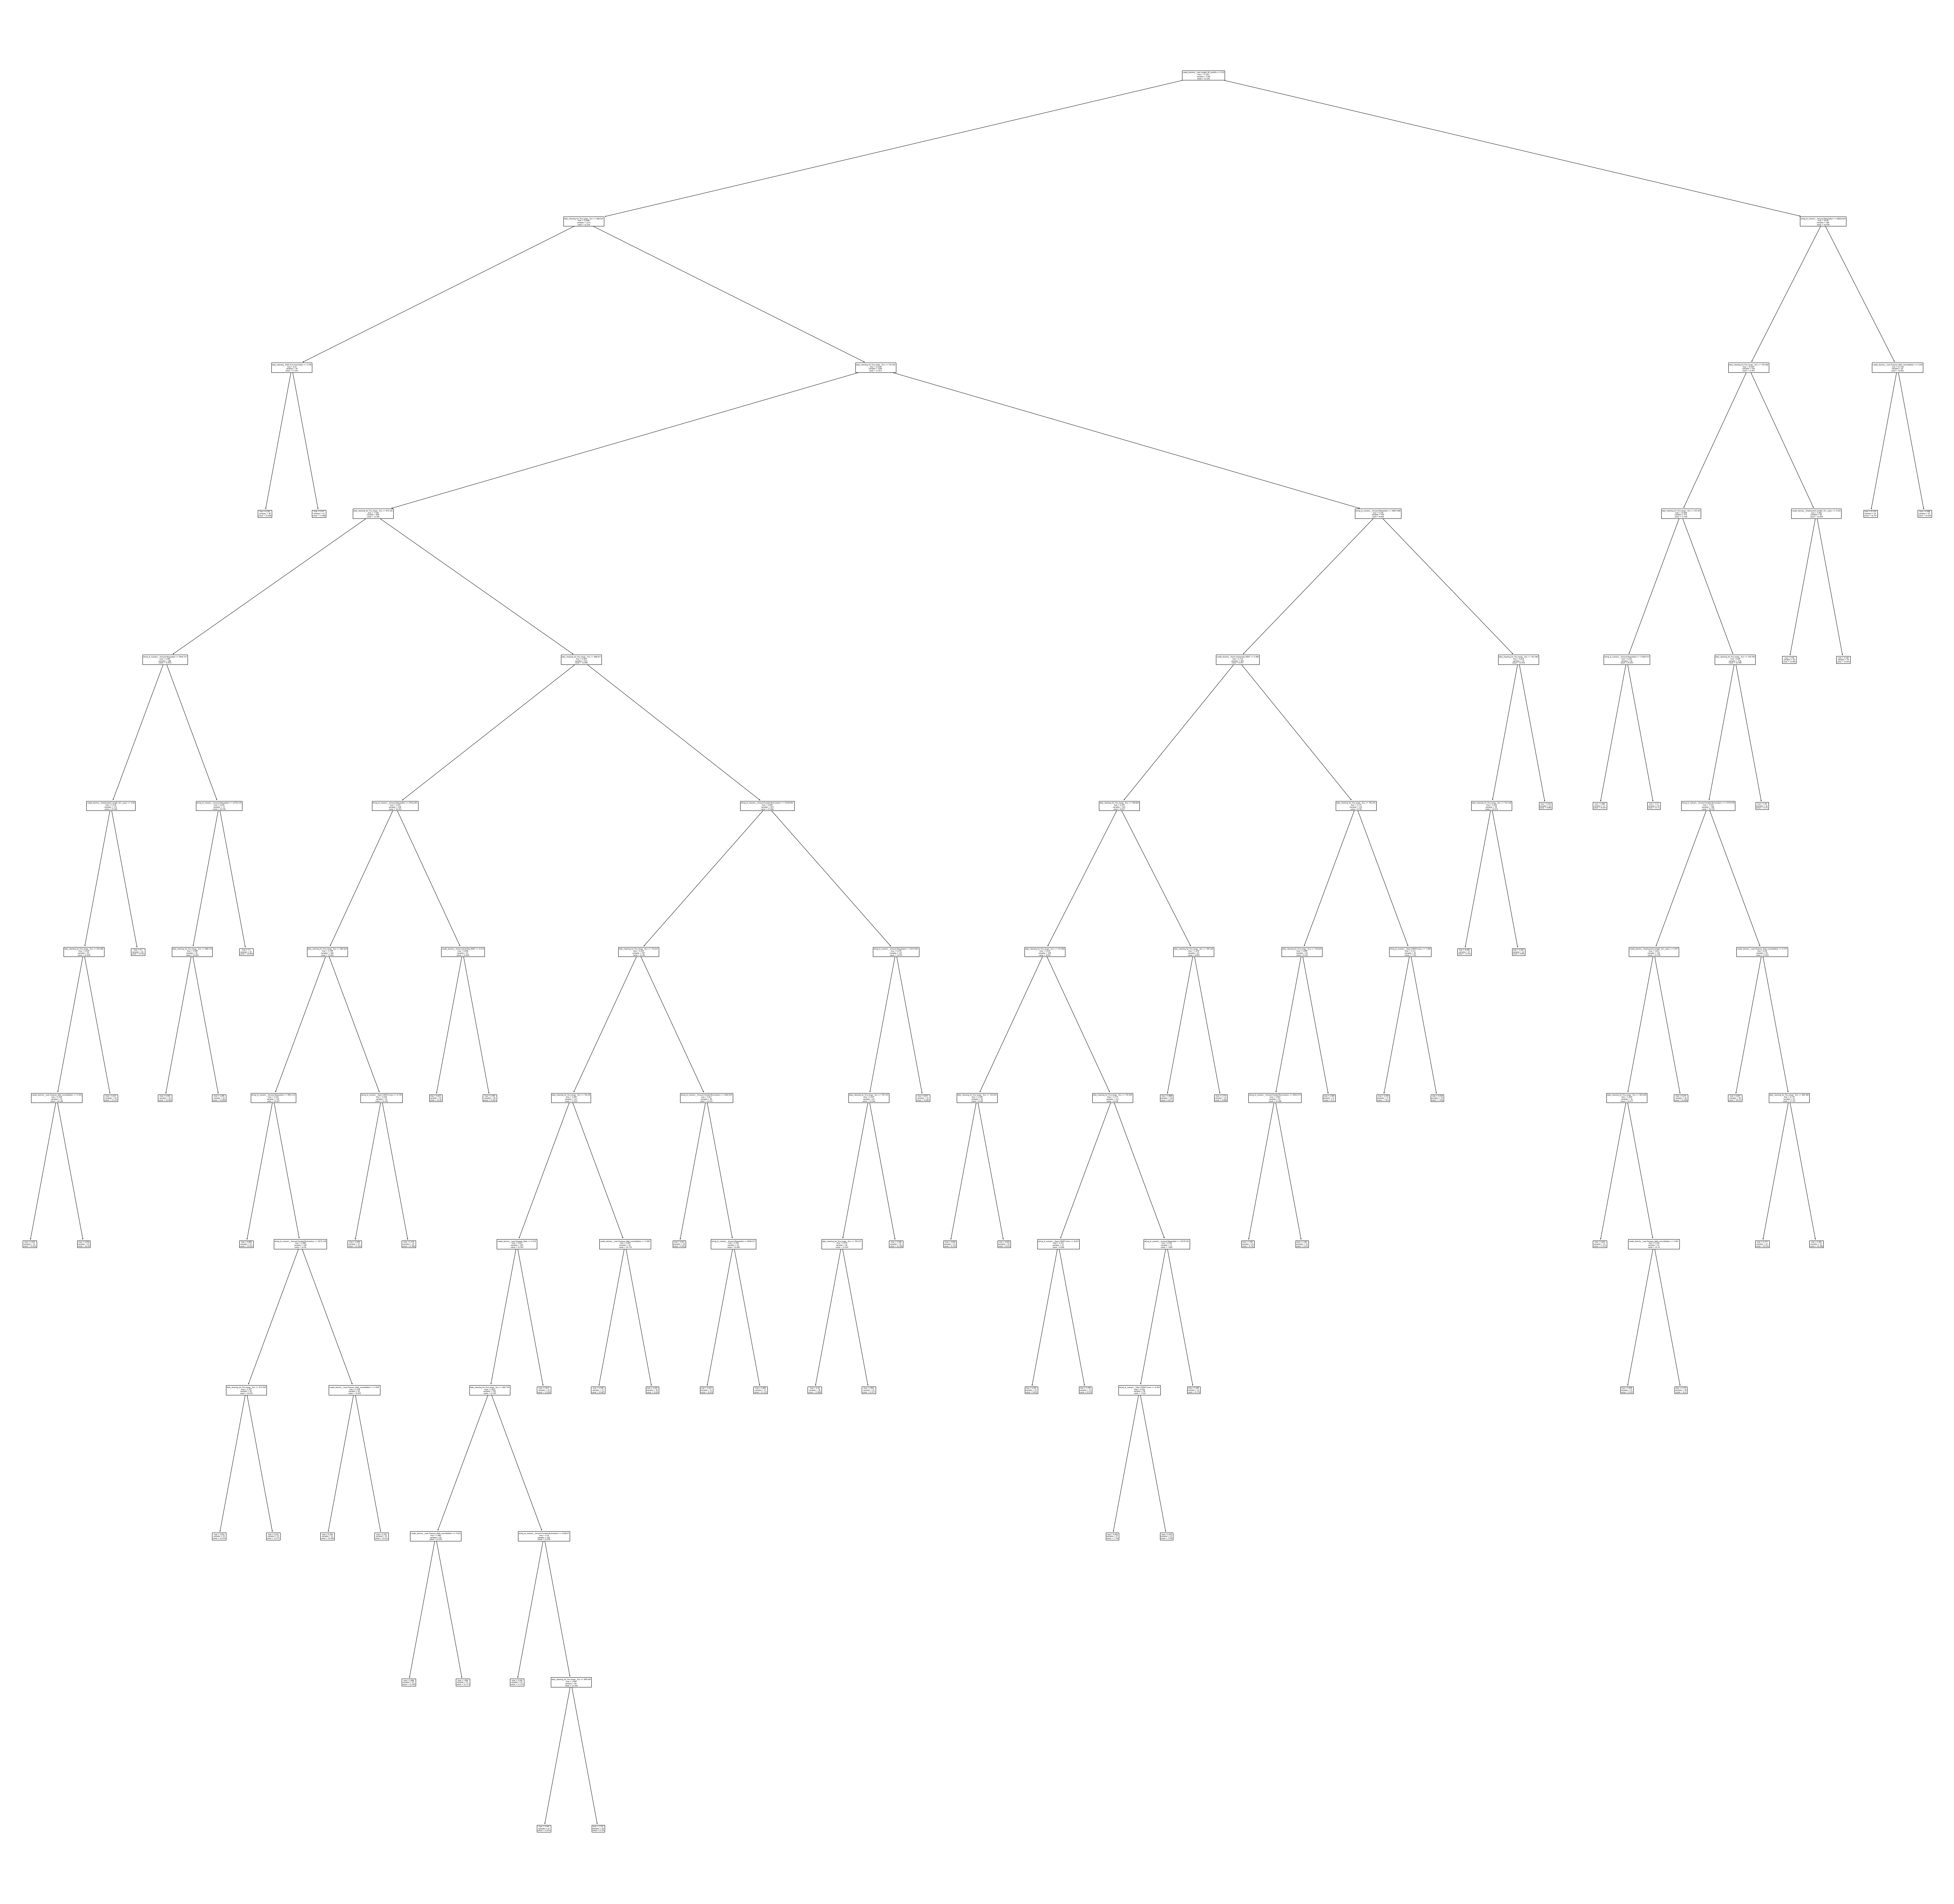

In [66]:
fig = plt.figure(figsize = (100,100))
tree.plot_tree(dtree_reg,feature_names=list(X_train.columns))

In [67]:
import os
os.getcwd()
dotfile = open("mytree.dot", 'w')

tree.export_graphviz(dtree_reg,out_file=dotfile,
                     feature_names=X_train.columns,
                    class_names=["0","1"],
                     )
dotfile.close()

Open mytree.dot file in a simple text editor and copy and paste the code here to visualise your tree : http://webgraphviz.com

# D. Baging - Decision Tree - ExtraTree and RandomForest  

## ExtraTree

In [68]:
et_dtree_model = ExtraTreesRegressor()
et_dtree_model_cv_scores = cross_val_score(et_dtree_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
et_dtree_model_cv_scores.mean()

-3.983247479295455

In [69]:
et_dtree_model.fit(X_train,Y_train)

ExtraTreesRegressor()

In [70]:
Y_predict = et_dtree_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [71]:
mean_absolute_error(Y_test,Y_predict)

1.4414070454545447

In [72]:
mean_squared_error(Y_test,Y_predict)

3.7240866285227265

In [73]:
r2_score(Y_test,Y_predict)

0.787725815701839

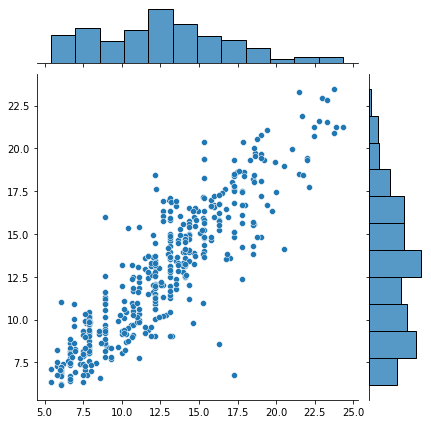

In [74]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## RandomForest

In [75]:
rf_dtree_model = RandomForestRegressor()
rf_dtree_model_cv_scores = cross_val_score(rf_dtree_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
rf_dtree_model_cv_scores.mean()

-3.7540548284488637

In [76]:
rf_dtree_model.fit(X_train,Y_train)

RandomForestRegressor()

In [77]:
Y_predict = rf_dtree_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [78]:
mean_absolute_error(Y_test,Y_predict)

1.3408627272727265

In [79]:
mean_squared_error(Y_test,Y_predict)

3.4120895803636344

In [80]:
r2_score(Y_test,Y_predict)

0.8055097518740427

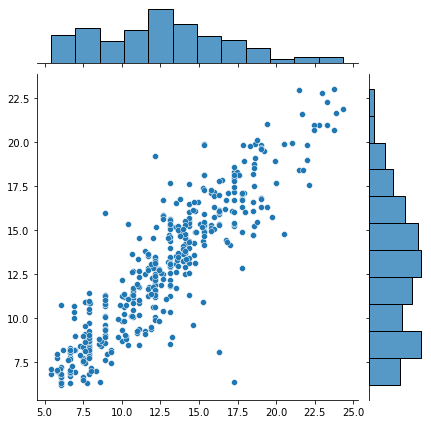

In [81]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## hyperparameter tuning

## ExtraTree

In [82]:
%%time
etree_reg_model = ExtraTreesRegressor()

etree_reg_params = {
    'n_estimators':[100,200,300,500,700,1000], #number of individual decision trees to be created
    'max_features': ['auto','sqrt','log2'], #how many features would be available at a split
    'bootstrap': [True, False], #should different data subsets go in or not
    'criterion':['mse','mae'],
    'max_depth':[None,5,10,15,20,30,50,70],
    'min_samples_leaf':[1,2,5,10,15,20], 
    'min_samples_split':[2,5,10,15,20]
}

etree_reg_random_search = RandomizedSearchCV(etree_reg_model,param_distributions=etree_reg_params,
                                             cv = 2, n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=1)

etree_reg_random_search.fit(X_train,Y_train)
report(etree_reg_random_search.cv_results_,3)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Model with rank: 1
Mean validation score: -3.990728 (std: 0.145900)
Parameters: {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'mse', 'bootstrap': False}

Model with rank: 2
Mean validation score: -8.534487 (std: 0.244675)
Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'mse', 'bootstrap': False}

Model with rank: 3
Mean validation score: -10.807326 (std: 0.650177)
Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'mse', 'bootstrap': True}

Wall time: 17.1 s


In [83]:
etree_reg = etree_reg_random_search.best_estimator_

In [84]:
etree_reg.fit(X_train,Y_train)

ExtraTreesRegressor(max_depth=30, min_samples_leaf=10, min_samples_split=20,
                    n_estimators=300)

In [85]:
Y_predict = etree_reg.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [86]:
mean_absolute_error(Y_test,Y_predict)

1.4047160716433056

In [87]:
mean_squared_error(Y_test,Y_predict)

3.513659207984175

In [88]:
r2_score(Y_test,Y_predict)

0.7997202491037565

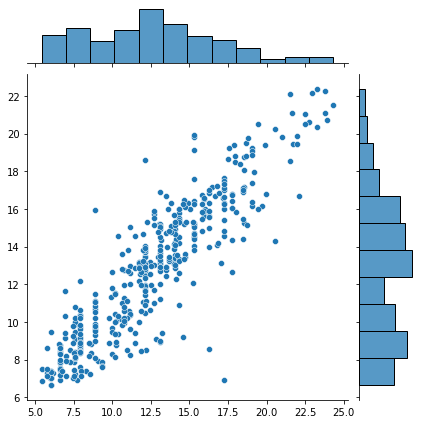

In [89]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## RandomForest 

In [90]:
%%time
rf_reg_model = RandomForestRegressor()

rf_reg_params = {
    'n_estimators':[100,200,300,500,700,1000], #number of individual decision trees to be created
    'max_features': ['auto','sqrt','log2'], #how many features would be available at a split
    'bootstrap': [True, False], #should different data subsets go in or not
    'criterion':['mse','mae'],
    'max_depth':[None,5,10,15,20,30,50,70],
    'min_samples_leaf':[1,2,5,10,15,20], 
    'min_samples_split':[2,5,10,15,20]
}

rf_reg_random_search = RandomizedSearchCV(rf_reg_model,param_distributions=rf_reg_params,
                                             cv = 2,
                                    n_iter=5,
                                    scoring='neg_mean_squared_error',
                                    n_jobs=-1,verbose=1)

rf_reg_random_search.fit(X_train,Y_train)
report(rf_reg_random_search.cv_results_,3)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Model with rank: 1
Mean validation score: -4.038982 (std: 0.164178)
Parameters: {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'mae', 'bootstrap': True}

Model with rank: 2
Mean validation score: -5.420601 (std: 0.205754)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'mae', 'bootstrap': False}

Model with rank: 3
Mean validation score: -5.452992 (std: 0.303521)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'mse', 'bootstrap': True}

Wall time: 52.7 s


In [91]:
rf_reg = rf_reg_random_search.best_estimator_

In [92]:
rf_reg.fit(X_train,Y_train)

RandomForestRegressor(criterion='mae', max_depth=20, min_samples_leaf=15,
                      min_samples_split=15, n_estimators=300)

In [93]:
Y_predict = rf_reg.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [94]:
mean_absolute_error(Y_test,Y_predict)

1.3671495454545457

In [95]:
mean_squared_error(Y_test,Y_predict)

3.485236438263885

In [96]:
r2_score(Y_test,Y_predict)

0.801340356491071

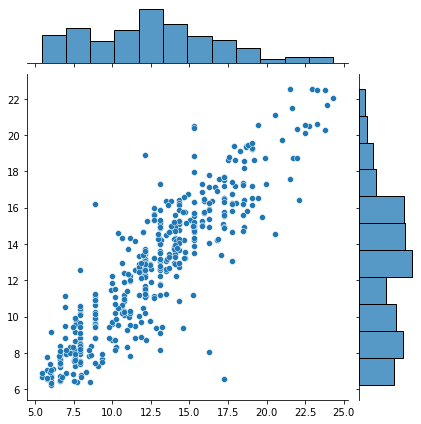

In [97]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

# E. Boosting

## AdaBoost regression

In [98]:
%%time
ada_model = AdaBoostRegressor()
ada_model_cv_scores = cross_val_score(ada_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
ada_model_cv_scores.mean()

Wall time: 385 ms
Parser   : 115 ms


-5.177411828236684

In [99]:
ada_model.fit(X_train,Y_train)

AdaBoostRegressor()

In [100]:
Y_predict = ada_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [101]:
mean_absolute_error(Y_test,Y_predict)

1.9190796170451712

In [102]:
mean_squared_error(Y_test,Y_predict)

5.442607693763339

In [103]:
r2_score(Y_test,Y_predict)

0.6897695397846308

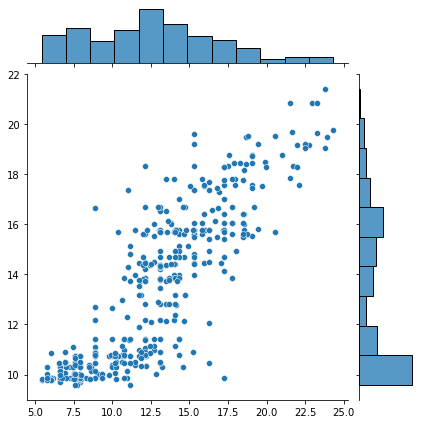

In [104]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## GradientBoost regression

In [105]:
%%time
Gra_model = GradientBoostingRegressor()
Gra_model_cv_scores = cross_val_score(Gra_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
Gra_model_cv_scores.mean()

Wall time: 417 ms
Parser   : 114 ms


-3.41465738041329

In [106]:
Gra_model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [107]:
Y_predict = Gra_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [108]:
mean_absolute_error(Y_test,Y_predict)

1.3594151559604664

In [109]:
mean_squared_error(Y_test,Y_predict)

3.293050758936618

In [110]:
r2_score(Y_test,Y_predict)

0.8122950045383337

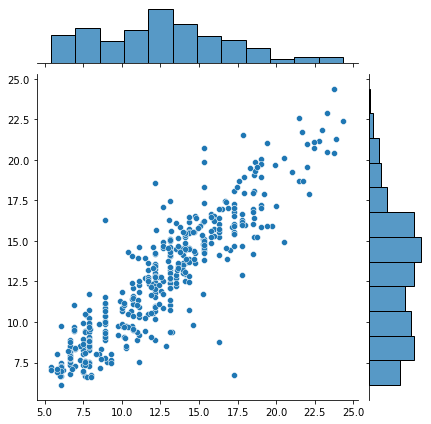

In [111]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## LGM regression

In [112]:
%%time
lgm_model = LGBMRegressor()
lgm_model_cv_scores = cross_val_score(lgm_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
lgm_model_cv_scores.mean()

Wall time: 2.57 s
Parser   : 107 ms


-3.6597209676837066

In [113]:
lgm_model.fit(X_train,Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 55
[LightGBM] [Info] Start training from score 13.154756


LGBMRegressor()

In [114]:
Y_predict = lgm_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [115]:
mean_absolute_error(Y_test,Y_predict)

1.378536849121191

In [116]:
mean_squared_error(Y_test,Y_predict)

3.5471801224787245

In [117]:
r2_score(Y_test,Y_predict)

0.797809545757932

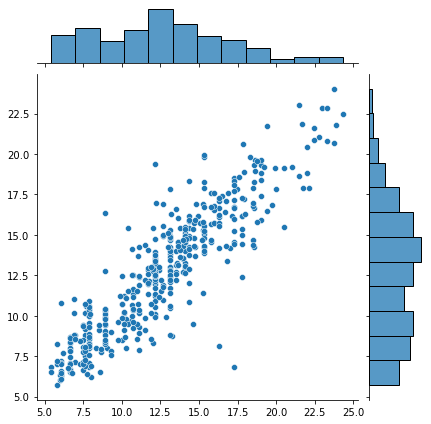

In [118]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## LGM regression

In [119]:
%%time
lgm_model = LGBMRegressor()
lgm_model_cv_scores = cross_val_score(lgm_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
lgm_model_cv_scores.mean()

Wall time: 2.19 s


-3.6597209676837066

In [120]:
lgm_model.fit(X_train,Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 55
[LightGBM] [Info] Start training from score 13.154756


LGBMRegressor()

In [121]:
Y_predict = lgm_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [122]:
mean_absolute_error(Y_test,Y_predict)

1.378536849121191

In [123]:
mean_squared_error(Y_test,Y_predict)

3.5471801224787245

In [124]:
r2_score(Y_test,Y_predict)

0.797809545757932

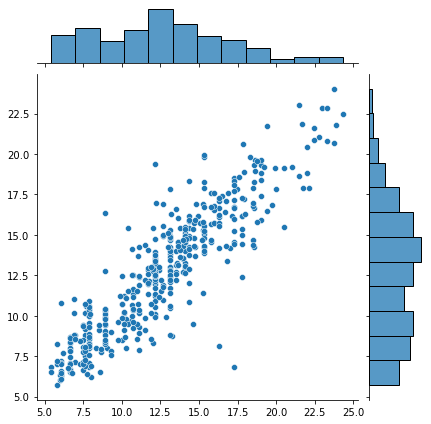

In [125]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## Cat regression

In [126]:
%%time
cat_model = CatBoostRegressor()
cat_model_cv_scores = cross_val_score(cat_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
cat_model_cv_scores.mean()

Wall time: 12.8 s


-3.4525142182659936

In [127]:
cat_model.fit(X_train,Y_train)

Learning rate set to 0.044768
0:	learn: 4.0317518	total: 120ms	remaining: 2m
1:	learn: 3.9075269	total: 123ms	remaining: 1m 1s
2:	learn: 3.7956967	total: 125ms	remaining: 41.6s
3:	learn: 3.6907251	total: 128ms	remaining: 31.8s
4:	learn: 3.5902845	total: 131ms	remaining: 26s
5:	learn: 3.5065800	total: 133ms	remaining: 22s
6:	learn: 3.4159361	total: 135ms	remaining: 19.2s
7:	learn: 3.3284617	total: 154ms	remaining: 19.1s
8:	learn: 3.2431685	total: 156ms	remaining: 17.2s
9:	learn: 3.1680386	total: 159ms	remaining: 15.8s
10:	learn: 3.0917968	total: 161ms	remaining: 14.5s
11:	learn: 3.0250487	total: 163ms	remaining: 13.5s
12:	learn: 2.9597106	total: 166ms	remaining: 12.6s
13:	learn: 2.8982900	total: 168ms	remaining: 11.8s
14:	learn: 2.8357304	total: 170ms	remaining: 11.2s
15:	learn: 2.7809637	total: 172ms	remaining: 10.6s
16:	learn: 2.7236917	total: 174ms	remaining: 10.1s
17:	learn: 2.6757947	total: 177ms	remaining: 9.64s
18:	learn: 2.6269294	total: 179ms	remaining: 9.23s
19:	learn: 2.58430

173:	learn: 1.5862818	total: 635ms	remaining: 3.02s
174:	learn: 1.5849040	total: 639ms	remaining: 3.01s
175:	learn: 1.5839007	total: 642ms	remaining: 3.01s
176:	learn: 1.5828802	total: 646ms	remaining: 3s
177:	learn: 1.5815322	total: 649ms	remaining: 3s
178:	learn: 1.5802631	total: 652ms	remaining: 2.99s
179:	learn: 1.5786728	total: 656ms	remaining: 2.99s
180:	learn: 1.5769656	total: 659ms	remaining: 2.98s
181:	learn: 1.5752706	total: 662ms	remaining: 2.98s
182:	learn: 1.5741085	total: 665ms	remaining: 2.97s
183:	learn: 1.5723018	total: 668ms	remaining: 2.96s
184:	learn: 1.5707276	total: 672ms	remaining: 2.96s
185:	learn: 1.5689955	total: 676ms	remaining: 2.96s
186:	learn: 1.5673376	total: 679ms	remaining: 2.95s
187:	learn: 1.5656758	total: 682ms	remaining: 2.95s
188:	learn: 1.5644204	total: 686ms	remaining: 2.94s
189:	learn: 1.5634188	total: 689ms	remaining: 2.94s
190:	learn: 1.5621569	total: 693ms	remaining: 2.93s
191:	learn: 1.5603844	total: 697ms	remaining: 2.93s
192:	learn: 1.5589

332:	learn: 1.3930037	total: 1.22s	remaining: 2.45s
333:	learn: 1.3917832	total: 1.23s	remaining: 2.45s
334:	learn: 1.3910257	total: 1.23s	remaining: 2.44s
335:	learn: 1.3904660	total: 1.23s	remaining: 2.44s
336:	learn: 1.3893556	total: 1.24s	remaining: 2.44s
337:	learn: 1.3883016	total: 1.24s	remaining: 2.43s
338:	learn: 1.3878565	total: 1.24s	remaining: 2.43s
339:	learn: 1.3867388	total: 1.25s	remaining: 2.42s
340:	learn: 1.3854309	total: 1.25s	remaining: 2.42s
341:	learn: 1.3846094	total: 1.25s	remaining: 2.41s
342:	learn: 1.3836153	total: 1.26s	remaining: 2.41s
343:	learn: 1.3819058	total: 1.26s	remaining: 2.41s
344:	learn: 1.3806743	total: 1.26s	remaining: 2.4s
345:	learn: 1.3791856	total: 1.27s	remaining: 2.4s
346:	learn: 1.3781183	total: 1.27s	remaining: 2.4s
347:	learn: 1.3775765	total: 1.28s	remaining: 2.39s
348:	learn: 1.3768701	total: 1.28s	remaining: 2.39s
349:	learn: 1.3757415	total: 1.28s	remaining: 2.38s
350:	learn: 1.3749270	total: 1.29s	remaining: 2.38s
351:	learn: 1.3

509:	learn: 1.2419638	total: 1.85s	remaining: 1.78s
510:	learn: 1.2412262	total: 1.85s	remaining: 1.77s
511:	learn: 1.2408053	total: 1.86s	remaining: 1.77s
512:	learn: 1.2403269	total: 1.86s	remaining: 1.76s
513:	learn: 1.2398627	total: 1.86s	remaining: 1.76s
514:	learn: 1.2393035	total: 1.87s	remaining: 1.76s
515:	learn: 1.2381616	total: 1.87s	remaining: 1.75s
516:	learn: 1.2372493	total: 1.87s	remaining: 1.75s
517:	learn: 1.2365804	total: 1.88s	remaining: 1.75s
518:	learn: 1.2356441	total: 1.88s	remaining: 1.74s
519:	learn: 1.2350484	total: 1.88s	remaining: 1.74s
520:	learn: 1.2341149	total: 1.89s	remaining: 1.74s
521:	learn: 1.2327737	total: 1.89s	remaining: 1.73s
522:	learn: 1.2321522	total: 1.89s	remaining: 1.73s
523:	learn: 1.2312424	total: 1.9s	remaining: 1.72s
524:	learn: 1.2309458	total: 1.9s	remaining: 1.72s
525:	learn: 1.2304076	total: 1.9s	remaining: 1.72s
526:	learn: 1.2290972	total: 1.91s	remaining: 1.71s
527:	learn: 1.2283326	total: 1.91s	remaining: 1.71s
528:	learn: 1.2

671:	learn: 1.1259110	total: 2.41s	remaining: 1.18s
672:	learn: 1.1254746	total: 2.42s	remaining: 1.18s
673:	learn: 1.1248137	total: 2.43s	remaining: 1.18s
674:	learn: 1.1244386	total: 2.44s	remaining: 1.17s
675:	learn: 1.1237273	total: 2.44s	remaining: 1.17s
676:	learn: 1.1231975	total: 2.45s	remaining: 1.17s
677:	learn: 1.1222895	total: 2.45s	remaining: 1.17s
678:	learn: 1.1218733	total: 2.46s	remaining: 1.16s
679:	learn: 1.1212298	total: 2.46s	remaining: 1.16s
680:	learn: 1.1207699	total: 2.46s	remaining: 1.15s
681:	learn: 1.1203803	total: 2.46s	remaining: 1.15s
682:	learn: 1.1196890	total: 2.47s	remaining: 1.15s
683:	learn: 1.1194792	total: 2.47s	remaining: 1.14s
684:	learn: 1.1187520	total: 2.47s	remaining: 1.14s
685:	learn: 1.1180574	total: 2.48s	remaining: 1.13s
686:	learn: 1.1177556	total: 2.48s	remaining: 1.13s
687:	learn: 1.1174494	total: 2.48s	remaining: 1.12s
688:	learn: 1.1171122	total: 2.48s	remaining: 1.12s
689:	learn: 1.1157344	total: 2.48s	remaining: 1.12s
690:	learn: 

832:	learn: 1.0335326	total: 2.92s	remaining: 585ms
833:	learn: 1.0329422	total: 2.92s	remaining: 582ms
834:	learn: 1.0325240	total: 2.93s	remaining: 578ms
835:	learn: 1.0314196	total: 2.93s	remaining: 575ms
836:	learn: 1.0308655	total: 2.93s	remaining: 571ms
837:	learn: 1.0303888	total: 2.94s	remaining: 567ms
838:	learn: 1.0298163	total: 2.94s	remaining: 564ms
839:	learn: 1.0292540	total: 2.94s	remaining: 560ms
840:	learn: 1.0288175	total: 2.94s	remaining: 557ms
841:	learn: 1.0276220	total: 2.95s	remaining: 553ms
842:	learn: 1.0273515	total: 2.95s	remaining: 550ms
843:	learn: 1.0268384	total: 2.96s	remaining: 546ms
844:	learn: 1.0260832	total: 2.96s	remaining: 543ms
845:	learn: 1.0258418	total: 2.96s	remaining: 539ms
846:	learn: 1.0253170	total: 2.97s	remaining: 536ms
847:	learn: 1.0250442	total: 2.97s	remaining: 532ms
848:	learn: 1.0243747	total: 2.97s	remaining: 529ms
849:	learn: 1.0240643	total: 2.98s	remaining: 525ms
850:	learn: 1.0234717	total: 2.98s	remaining: 522ms
851:	learn: 

In [128]:
Y_predict = cat_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [129]:
mean_absolute_error(Y_test,Y_predict)

1.3486686833114037

In [130]:
mean_squared_error(Y_test,Y_predict)

3.3628140768007433

In [131]:
r2_score(Y_test,Y_predict)

0.8083184720699108

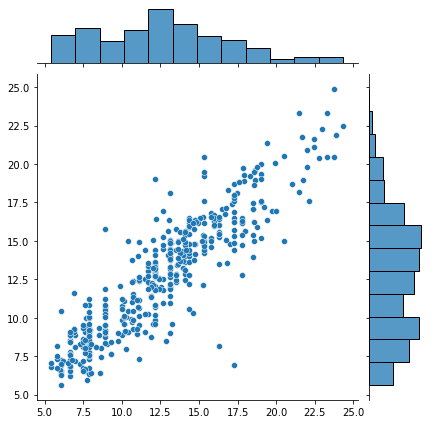

In [132]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## XGM regression

In [156]:
%%time
xgb_model = XGBRegressor()
xgb_model_cv_scores = cross_val_score(xgb_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
xgb_model_cv_scores.mean()

Wall time: 1.73 s


-4.040459433722126

In [157]:
xgb_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [158]:
Y_predict = xgb_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [159]:
mean_absolute_error(Y_test,Y_predict)

1.4259869210503318

In [160]:
mean_squared_error(Y_test,Y_predict)

3.7770786516630412

In [161]:
r2_score(Y_test,Y_predict)

0.7847052526461182

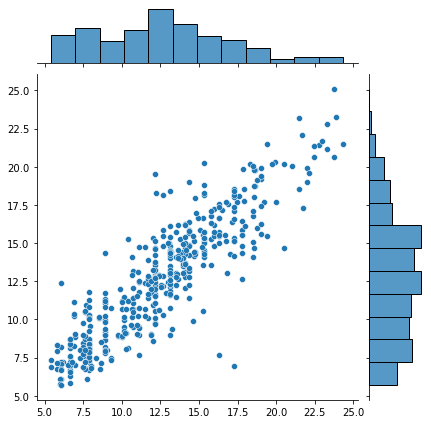

In [162]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

## StackingRegressor

In [163]:
estimators = [
    ('lm_1',Lm_1),
    ('lm_2',Lm_2),
    ('Lm_3',Lm_3),
    ('dtree_model',dtree_model),
    ('et_dtree_model',et_dtree_model),
    ('rf_dtree_model',rf_dtree_model),
    ('etree_reg_model',etree_reg_model),
    ('rf_reg_model',rf_reg_model),
    ('ada_model',ada_model),
    ('Gra_model',Gra_model),
    ('lgm_model',lgm_model),
    ('cat_model',cat_model),
    ('xgb_model',xgb_model),
]

stack_reg_model = StackingRegressor(estimators=estimators,final_estimator=Lasso())

# stack_cv_scores= cross_val_score(stack_reg_model,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
# stack_cv_scores.mean()

In [164]:
%%time
stack_reg_model.fit(X_train,Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 55
[LightGBM] [Info] Start training from score 13.154756
Learning rate set to 0.044768
0:	learn: 4.0317518	total: 8.29ms	remaining: 8.28s
1:	learn: 3.9075269	total: 16.9ms	remaining: 8.42s
2:	learn: 3.7956967	total: 24.8ms	remaining: 8.24s
3:	learn: 3.6907251	total: 30.2ms	remaining: 7.52s
4:	learn: 3.5902845	total: 34.6ms	remaining: 6.88s
5:	learn: 3.5065800	total: 38.3ms	remaining: 6.35s
6:	learn: 3.4159361	total: 42.1ms	remaining: 5.97s
7:	learn: 3.3284617	total: 44.9ms	remaining: 5.57s
8:	learn: 3.2431685	total: 48.1ms	remaining: 5.3s
9:	learn: 3.1680386	total: 50.7ms	remaining: 5.01s
10:	learn: 3.0917968	total: 53.1ms	rema

155:	learn: 1.6103455	total: 345ms	remaining: 1.87s
156:	learn: 1.6088498	total: 347ms	remaining: 1.86s
157:	learn: 1.6072552	total: 349ms	remaining: 1.86s
158:	learn: 1.6052213	total: 351ms	remaining: 1.86s
159:	learn: 1.6042390	total: 353ms	remaining: 1.85s
160:	learn: 1.6033947	total: 355ms	remaining: 1.85s
161:	learn: 1.6019606	total: 357ms	remaining: 1.84s
162:	learn: 1.6005228	total: 358ms	remaining: 1.84s
163:	learn: 1.5993542	total: 360ms	remaining: 1.84s
164:	learn: 1.5978921	total: 363ms	remaining: 1.83s
165:	learn: 1.5970510	total: 365ms	remaining: 1.83s
166:	learn: 1.5952650	total: 367ms	remaining: 1.83s
167:	learn: 1.5945061	total: 369ms	remaining: 1.83s
168:	learn: 1.5930832	total: 378ms	remaining: 1.86s
169:	learn: 1.5922788	total: 384ms	remaining: 1.87s
170:	learn: 1.5907964	total: 389ms	remaining: 1.88s
171:	learn: 1.5894184	total: 392ms	remaining: 1.89s
172:	learn: 1.5880523	total: 396ms	remaining: 1.89s
173:	learn: 1.5862818	total: 399ms	remaining: 1.9s
174:	learn: 1

327:	learn: 1.3978818	total: 692ms	remaining: 1.42s
328:	learn: 1.3973475	total: 694ms	remaining: 1.42s
329:	learn: 1.3962395	total: 696ms	remaining: 1.41s
330:	learn: 1.3951171	total: 698ms	remaining: 1.41s
331:	learn: 1.3939042	total: 699ms	remaining: 1.41s
332:	learn: 1.3930037	total: 701ms	remaining: 1.4s
333:	learn: 1.3917832	total: 703ms	remaining: 1.4s
334:	learn: 1.3910257	total: 704ms	remaining: 1.4s
335:	learn: 1.3904660	total: 706ms	remaining: 1.4s
336:	learn: 1.3893556	total: 708ms	remaining: 1.39s
337:	learn: 1.3883016	total: 709ms	remaining: 1.39s
338:	learn: 1.3878565	total: 711ms	remaining: 1.39s
339:	learn: 1.3867388	total: 713ms	remaining: 1.38s
340:	learn: 1.3854309	total: 715ms	remaining: 1.38s
341:	learn: 1.3846094	total: 717ms	remaining: 1.38s
342:	learn: 1.3836153	total: 719ms	remaining: 1.38s
343:	learn: 1.3819058	total: 721ms	remaining: 1.37s
344:	learn: 1.3806743	total: 723ms	remaining: 1.37s
345:	learn: 1.3791856	total: 725ms	remaining: 1.37s
346:	learn: 1.37

519:	learn: 1.2350484	total: 1.05s	remaining: 970ms
520:	learn: 1.2341149	total: 1.06s	remaining: 972ms
521:	learn: 1.2327737	total: 1.06s	remaining: 973ms
522:	learn: 1.2321522	total: 1.06s	remaining: 972ms
523:	learn: 1.2312424	total: 1.07s	remaining: 972ms
524:	learn: 1.2309458	total: 1.07s	remaining: 971ms
525:	learn: 1.2304076	total: 1.07s	remaining: 970ms
526:	learn: 1.2290972	total: 1.08s	remaining: 968ms
527:	learn: 1.2283326	total: 1.08s	remaining: 966ms
528:	learn: 1.2275949	total: 1.08s	remaining: 965ms
529:	learn: 1.2271035	total: 1.08s	remaining: 963ms
530:	learn: 1.2261900	total: 1.09s	remaining: 960ms
531:	learn: 1.2249707	total: 1.09s	remaining: 958ms
532:	learn: 1.2243398	total: 1.09s	remaining: 956ms
533:	learn: 1.2240339	total: 1.09s	remaining: 954ms
534:	learn: 1.2230669	total: 1.09s	remaining: 951ms
535:	learn: 1.2221612	total: 1.1s	remaining: 949ms
536:	learn: 1.2212339	total: 1.1s	remaining: 947ms
537:	learn: 1.2207673	total: 1.1s	remaining: 945ms
538:	learn: 1.2

698:	learn: 1.1099514	total: 1.4s	remaining: 604ms
699:	learn: 1.1090527	total: 1.41s	remaining: 603ms
700:	learn: 1.1086543	total: 1.41s	remaining: 602ms
701:	learn: 1.1078972	total: 1.42s	remaining: 601ms
702:	learn: 1.1071155	total: 1.42s	remaining: 600ms
703:	learn: 1.1065331	total: 1.42s	remaining: 598ms
704:	learn: 1.1059214	total: 1.43s	remaining: 596ms
705:	learn: 1.1050800	total: 1.43s	remaining: 595ms
706:	learn: 1.1045922	total: 1.43s	remaining: 593ms
707:	learn: 1.1042789	total: 1.43s	remaining: 591ms
708:	learn: 1.1032525	total: 1.44s	remaining: 589ms
709:	learn: 1.1026240	total: 1.44s	remaining: 587ms
710:	learn: 1.1020582	total: 1.44s	remaining: 585ms
711:	learn: 1.1015624	total: 1.44s	remaining: 583ms
712:	learn: 1.1010781	total: 1.44s	remaining: 581ms
713:	learn: 1.1006959	total: 1.45s	remaining: 579ms
714:	learn: 1.1003594	total: 1.45s	remaining: 577ms
715:	learn: 1.1000315	total: 1.45s	remaining: 575ms
716:	learn: 1.0995158	total: 1.45s	remaining: 573ms
717:	learn: 1

869:	learn: 1.0136250	total: 1.75s	remaining: 262ms
870:	learn: 1.0127865	total: 1.76s	remaining: 261ms
871:	learn: 1.0121978	total: 1.76s	remaining: 259ms
872:	learn: 1.0112784	total: 1.77s	remaining: 257ms
873:	learn: 1.0102028	total: 1.77s	remaining: 256ms
874:	learn: 1.0089926	total: 1.77s	remaining: 254ms
875:	learn: 1.0087136	total: 1.78s	remaining: 252ms
876:	learn: 1.0082421	total: 1.78s	remaining: 250ms
877:	learn: 1.0079768	total: 1.78s	remaining: 248ms
878:	learn: 1.0071318	total: 1.79s	remaining: 246ms
879:	learn: 1.0066414	total: 1.79s	remaining: 244ms
880:	learn: 1.0061872	total: 1.79s	remaining: 242ms
881:	learn: 1.0053609	total: 1.79s	remaining: 240ms
882:	learn: 1.0050766	total: 1.79s	remaining: 238ms
883:	learn: 1.0047433	total: 1.8s	remaining: 236ms
884:	learn: 1.0039925	total: 1.8s	remaining: 234ms
885:	learn: 1.0038141	total: 1.8s	remaining: 232ms
886:	learn: 1.0033477	total: 1.8s	remaining: 230ms
887:	learn: 1.0028359	total: 1.8s	remaining: 228ms
888:	learn: 1.002

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 1408, number of used features: 50
[LightGBM] [Info] Start training from score 13.163160
Learning rate set to 0.043217
0:	learn: 4.0290018	total: 3.89ms	remaining: 3.88s
1:	learn: 3.9095472	total: 7.64ms	remaining: 3.81s
2:	learn: 3.8023159	total: 11.5ms	remaining: 3.84s
3:	learn: 3.7024469	total: 14.9ms	remaining: 3.71s
4:	learn: 3.6111209	total: 18.2ms	remaining: 3.63s
5:	learn: 3.5206801	total: 21.5ms	remaining: 3.56s
6:	learn: 3.4340289	total: 24.9ms	remaining: 3.53s
7:	learn: 3.3450370	total: 28.5ms	remaining: 3.53s
8:	learn: 3.2683133	total: 32ms	remaining: 3.52s
9:	learn: 3.1960771	total: 35.6ms	remaining: 3.52s
10:	learn: 3.1220289	total: 39ms	remaini

161:	learn: 1.5811835	total: 533ms	remaining: 2.76s
162:	learn: 1.5795411	total: 536ms	remaining: 2.75s
163:	learn: 1.5781311	total: 540ms	remaining: 2.75s
164:	learn: 1.5765283	total: 543ms	remaining: 2.75s
165:	learn: 1.5750494	total: 546ms	remaining: 2.74s
166:	learn: 1.5726942	total: 549ms	remaining: 2.74s
167:	learn: 1.5711590	total: 552ms	remaining: 2.74s
168:	learn: 1.5693622	total: 556ms	remaining: 2.73s
169:	learn: 1.5686614	total: 559ms	remaining: 2.73s
170:	learn: 1.5668567	total: 563ms	remaining: 2.73s
171:	learn: 1.5651138	total: 566ms	remaining: 2.73s
172:	learn: 1.5638978	total: 569ms	remaining: 2.72s
173:	learn: 1.5623615	total: 573ms	remaining: 2.72s
174:	learn: 1.5609661	total: 576ms	remaining: 2.71s
175:	learn: 1.5595878	total: 579ms	remaining: 2.71s
176:	learn: 1.5575931	total: 582ms	remaining: 2.71s
177:	learn: 1.5561220	total: 585ms	remaining: 2.7s
178:	learn: 1.5539747	total: 588ms	remaining: 2.7s
179:	learn: 1.5524296	total: 591ms	remaining: 2.69s
180:	learn: 1.

319:	learn: 1.3660180	total: 1.05s	remaining: 2.23s
320:	learn: 1.3646585	total: 1.05s	remaining: 2.22s
321:	learn: 1.3636256	total: 1.05s	remaining: 2.22s
322:	learn: 1.3615180	total: 1.06s	remaining: 2.22s
323:	learn: 1.3603312	total: 1.06s	remaining: 2.21s
324:	learn: 1.3590527	total: 1.06s	remaining: 2.21s
325:	learn: 1.3581862	total: 1.07s	remaining: 2.21s
326:	learn: 1.3577087	total: 1.07s	remaining: 2.21s
327:	learn: 1.3571650	total: 1.08s	remaining: 2.2s
328:	learn: 1.3560944	total: 1.08s	remaining: 2.2s
329:	learn: 1.3551884	total: 1.08s	remaining: 2.2s
330:	learn: 1.3532686	total: 1.09s	remaining: 2.2s
331:	learn: 1.3527168	total: 1.09s	remaining: 2.19s
332:	learn: 1.3512891	total: 1.09s	remaining: 2.19s
333:	learn: 1.3504944	total: 1.1s	remaining: 2.19s
334:	learn: 1.3488903	total: 1.1s	remaining: 2.19s
335:	learn: 1.3479257	total: 1.1s	remaining: 2.18s
336:	learn: 1.3468525	total: 1.11s	remaining: 2.18s
337:	learn: 1.3452835	total: 1.11s	remaining: 2.18s
338:	learn: 1.34389

478:	learn: 1.1991721	total: 1.57s	remaining: 1.71s
479:	learn: 1.1984325	total: 1.57s	remaining: 1.7s
480:	learn: 1.1974455	total: 1.58s	remaining: 1.7s
481:	learn: 1.1965022	total: 1.58s	remaining: 1.7s
482:	learn: 1.1957770	total: 1.58s	remaining: 1.69s
483:	learn: 1.1946401	total: 1.59s	remaining: 1.69s
484:	learn: 1.1938227	total: 1.59s	remaining: 1.69s
485:	learn: 1.1928027	total: 1.59s	remaining: 1.68s
486:	learn: 1.1916295	total: 1.59s	remaining: 1.68s
487:	learn: 1.1905798	total: 1.6s	remaining: 1.68s
488:	learn: 1.1902131	total: 1.6s	remaining: 1.67s
489:	learn: 1.1895612	total: 1.6s	remaining: 1.67s
490:	learn: 1.1884242	total: 1.61s	remaining: 1.67s
491:	learn: 1.1881047	total: 1.61s	remaining: 1.66s
492:	learn: 1.1864078	total: 1.61s	remaining: 1.66s
493:	learn: 1.1858255	total: 1.62s	remaining: 1.66s
494:	learn: 1.1853526	total: 1.62s	remaining: 1.66s
495:	learn: 1.1846464	total: 1.63s	remaining: 1.65s
496:	learn: 1.1837716	total: 1.63s	remaining: 1.65s
497:	learn: 1.1831

641:	learn: 1.0698448	total: 2.1s	remaining: 1.17s
642:	learn: 1.0691862	total: 2.1s	remaining: 1.17s
643:	learn: 1.0685441	total: 2.1s	remaining: 1.16s
644:	learn: 1.0678496	total: 2.11s	remaining: 1.16s
645:	learn: 1.0674868	total: 2.11s	remaining: 1.16s
646:	learn: 1.0663963	total: 2.11s	remaining: 1.15s
647:	learn: 1.0654428	total: 2.12s	remaining: 1.15s
648:	learn: 1.0650255	total: 2.12s	remaining: 1.15s
649:	learn: 1.0646488	total: 2.12s	remaining: 1.14s
650:	learn: 1.0641606	total: 2.13s	remaining: 1.14s
651:	learn: 1.0632306	total: 2.13s	remaining: 1.14s
652:	learn: 1.0627871	total: 2.13s	remaining: 1.13s
653:	learn: 1.0621955	total: 2.14s	remaining: 1.13s
654:	learn: 1.0610355	total: 2.14s	remaining: 1.13s
655:	learn: 1.0601648	total: 2.14s	remaining: 1.12s
656:	learn: 1.0592259	total: 2.15s	remaining: 1.12s
657:	learn: 1.0586524	total: 2.15s	remaining: 1.12s
658:	learn: 1.0577594	total: 2.15s	remaining: 1.11s
659:	learn: 1.0570445	total: 2.16s	remaining: 1.11s
660:	learn: 1.0

804:	learn: 0.9605797	total: 2.63s	remaining: 637ms
805:	learn: 0.9601660	total: 2.63s	remaining: 633ms
806:	learn: 0.9593401	total: 2.63s	remaining: 630ms
807:	learn: 0.9589139	total: 2.64s	remaining: 627ms
808:	learn: 0.9583948	total: 2.64s	remaining: 624ms
809:	learn: 0.9576649	total: 2.64s	remaining: 620ms
810:	learn: 0.9571390	total: 2.65s	remaining: 617ms
811:	learn: 0.9566817	total: 2.65s	remaining: 614ms
812:	learn: 0.9559228	total: 2.65s	remaining: 610ms
813:	learn: 0.9550242	total: 2.66s	remaining: 607ms
814:	learn: 0.9541979	total: 2.66s	remaining: 604ms
815:	learn: 0.9534355	total: 2.66s	remaining: 601ms
816:	learn: 0.9527606	total: 2.67s	remaining: 597ms
817:	learn: 0.9520018	total: 2.67s	remaining: 594ms
818:	learn: 0.9516054	total: 2.67s	remaining: 591ms
819:	learn: 0.9509674	total: 2.68s	remaining: 587ms
820:	learn: 0.9501685	total: 2.68s	remaining: 584ms
821:	learn: 0.9496622	total: 2.68s	remaining: 581ms
822:	learn: 0.9491910	total: 2.69s	remaining: 578ms
823:	learn: 

967:	learn: 0.8657827	total: 3.16s	remaining: 104ms
968:	learn: 0.8649095	total: 3.16s	remaining: 101ms
969:	learn: 0.8645452	total: 3.17s	remaining: 97.9ms
970:	learn: 0.8636158	total: 3.17s	remaining: 94.6ms
971:	learn: 0.8631772	total: 3.17s	remaining: 91.4ms
972:	learn: 0.8627197	total: 3.17s	remaining: 88.1ms
973:	learn: 0.8619496	total: 3.18s	remaining: 84.8ms
974:	learn: 0.8615578	total: 3.18s	remaining: 81.6ms
975:	learn: 0.8610296	total: 3.18s	remaining: 78.3ms
976:	learn: 0.8606007	total: 3.19s	remaining: 75ms
977:	learn: 0.8601711	total: 3.19s	remaining: 71.8ms
978:	learn: 0.8600021	total: 3.19s	remaining: 68.5ms
979:	learn: 0.8594115	total: 3.2s	remaining: 65.2ms
980:	learn: 0.8591082	total: 3.2s	remaining: 62ms
981:	learn: 0.8586527	total: 3.2s	remaining: 58.7ms
982:	learn: 0.8581245	total: 3.21s	remaining: 55.4ms
983:	learn: 0.8577890	total: 3.21s	remaining: 52.2ms
984:	learn: 0.8570781	total: 3.21s	remaining: 48.9ms
985:	learn: 0.8565218	total: 3.21s	remaining: 45.7ms
98

144:	learn: 1.6428657	total: 344ms	remaining: 2.03s
145:	learn: 1.6416184	total: 347ms	remaining: 2.03s
146:	learn: 1.6405723	total: 350ms	remaining: 2.03s
147:	learn: 1.6379328	total: 352ms	remaining: 2.03s
148:	learn: 1.6368394	total: 355ms	remaining: 2.03s
149:	learn: 1.6347423	total: 358ms	remaining: 2.03s
150:	learn: 1.6324655	total: 361ms	remaining: 2.03s
151:	learn: 1.6316600	total: 364ms	remaining: 2.03s
152:	learn: 1.6290589	total: 368ms	remaining: 2.04s
153:	learn: 1.6279374	total: 371ms	remaining: 2.04s
154:	learn: 1.6267086	total: 375ms	remaining: 2.04s
155:	learn: 1.6253276	total: 378ms	remaining: 2.04s
156:	learn: 1.6238076	total: 381ms	remaining: 2.05s
157:	learn: 1.6224834	total: 385ms	remaining: 2.05s
158:	learn: 1.6205693	total: 388ms	remaining: 2.05s
159:	learn: 1.6195120	total: 391ms	remaining: 2.05s
160:	learn: 1.6166682	total: 394ms	remaining: 2.05s
161:	learn: 1.6151644	total: 397ms	remaining: 2.06s
162:	learn: 1.6138457	total: 400ms	remaining: 2.06s
163:	learn: 

303:	learn: 1.4212641	total: 871ms	remaining: 1.99s
304:	learn: 1.4197006	total: 875ms	remaining: 1.99s
305:	learn: 1.4183148	total: 878ms	remaining: 1.99s
306:	learn: 1.4172687	total: 882ms	remaining: 1.99s
307:	learn: 1.4156274	total: 885ms	remaining: 1.99s
308:	learn: 1.4140950	total: 889ms	remaining: 1.99s
309:	learn: 1.4128752	total: 892ms	remaining: 1.99s
310:	learn: 1.4114033	total: 895ms	remaining: 1.98s
311:	learn: 1.4108765	total: 899ms	remaining: 1.98s
312:	learn: 1.4095263	total: 903ms	remaining: 1.98s
313:	learn: 1.4082868	total: 906ms	remaining: 1.98s
314:	learn: 1.4070647	total: 910ms	remaining: 1.98s
315:	learn: 1.4059365	total: 913ms	remaining: 1.98s
316:	learn: 1.4044017	total: 917ms	remaining: 1.98s
317:	learn: 1.4041295	total: 920ms	remaining: 1.97s
318:	learn: 1.4029158	total: 923ms	remaining: 1.97s
319:	learn: 1.4019627	total: 926ms	remaining: 1.97s
320:	learn: 1.4007484	total: 929ms	remaining: 1.97s
321:	learn: 1.3996941	total: 932ms	remaining: 1.96s
322:	learn: 

509:	learn: 1.2176214	total: 1.57s	remaining: 1.51s
510:	learn: 1.2169861	total: 1.58s	remaining: 1.51s
511:	learn: 1.2153196	total: 1.58s	remaining: 1.51s
512:	learn: 1.2145748	total: 1.58s	remaining: 1.5s
513:	learn: 1.2141018	total: 1.59s	remaining: 1.5s
514:	learn: 1.2130569	total: 1.59s	remaining: 1.5s
515:	learn: 1.2121738	total: 1.6s	remaining: 1.5s
516:	learn: 1.2111343	total: 1.6s	remaining: 1.49s
517:	learn: 1.2106044	total: 1.6s	remaining: 1.49s
518:	learn: 1.2102515	total: 1.61s	remaining: 1.49s
519:	learn: 1.2096176	total: 1.61s	remaining: 1.49s
520:	learn: 1.2087800	total: 1.61s	remaining: 1.48s
521:	learn: 1.2075357	total: 1.62s	remaining: 1.48s
522:	learn: 1.2069960	total: 1.62s	remaining: 1.48s
523:	learn: 1.2059033	total: 1.62s	remaining: 1.48s
524:	learn: 1.2050041	total: 1.63s	remaining: 1.47s
525:	learn: 1.2045739	total: 1.63s	remaining: 1.47s
526:	learn: 1.2029514	total: 1.63s	remaining: 1.47s
527:	learn: 1.2015669	total: 1.64s	remaining: 1.46s
528:	learn: 1.20057

721:	learn: 1.0448950	total: 2.27s	remaining: 876ms
722:	learn: 1.0442691	total: 2.28s	remaining: 873ms
723:	learn: 1.0434677	total: 2.28s	remaining: 870ms
724:	learn: 1.0431918	total: 2.29s	remaining: 867ms
725:	learn: 1.0423653	total: 2.29s	remaining: 864ms
726:	learn: 1.0415891	total: 2.29s	remaining: 861ms
727:	learn: 1.0408352	total: 2.29s	remaining: 857ms
728:	learn: 1.0400928	total: 2.3s	remaining: 854ms
729:	learn: 1.0390315	total: 2.3s	remaining: 851ms
730:	learn: 1.0387145	total: 2.3s	remaining: 848ms
731:	learn: 1.0381601	total: 2.31s	remaining: 845ms
732:	learn: 1.0374354	total: 2.31s	remaining: 842ms
733:	learn: 1.0367927	total: 2.32s	remaining: 839ms
734:	learn: 1.0358080	total: 2.32s	remaining: 836ms
735:	learn: 1.0352359	total: 2.32s	remaining: 833ms
736:	learn: 1.0345829	total: 2.33s	remaining: 830ms
737:	learn: 1.0339813	total: 2.33s	remaining: 827ms
738:	learn: 1.0331350	total: 2.33s	remaining: 824ms
739:	learn: 1.0322226	total: 2.34s	remaining: 821ms
740:	learn: 1.0

930:	learn: 0.9076767	total: 2.98s	remaining: 221ms
931:	learn: 0.9071004	total: 2.98s	remaining: 217ms
932:	learn: 0.9060779	total: 2.98s	remaining: 214ms
933:	learn: 0.9054528	total: 2.98s	remaining: 211ms
934:	learn: 0.9044197	total: 2.99s	remaining: 208ms
935:	learn: 0.9037795	total: 2.99s	remaining: 205ms
936:	learn: 0.9030596	total: 3s	remaining: 201ms
937:	learn: 0.9022808	total: 3s	remaining: 198ms
938:	learn: 0.9015773	total: 3s	remaining: 195ms
939:	learn: 0.9012422	total: 3.01s	remaining: 192ms
940:	learn: 0.9006331	total: 3.01s	remaining: 189ms
941:	learn: 0.9001924	total: 3.01s	remaining: 186ms
942:	learn: 0.8993858	total: 3.02s	remaining: 182ms
943:	learn: 0.8989578	total: 3.02s	remaining: 179ms
944:	learn: 0.8986495	total: 3.02s	remaining: 176ms
945:	learn: 0.8980808	total: 3.03s	remaining: 173ms
946:	learn: 0.8973604	total: 3.03s	remaining: 170ms
947:	learn: 0.8965705	total: 3.03s	remaining: 166ms
948:	learn: 0.8960694	total: 3.04s	remaining: 163ms
949:	learn: 0.8952220

142:	learn: 1.6335568	total: 348ms	remaining: 2.09s
143:	learn: 1.6323352	total: 351ms	remaining: 2.09s
144:	learn: 1.6303732	total: 355ms	remaining: 2.09s
145:	learn: 1.6293952	total: 358ms	remaining: 2.09s
146:	learn: 1.6276492	total: 361ms	remaining: 2.09s
147:	learn: 1.6253640	total: 363ms	remaining: 2.09s
148:	learn: 1.6236491	total: 366ms	remaining: 2.09s
149:	learn: 1.6213924	total: 369ms	remaining: 2.09s
150:	learn: 1.6201974	total: 372ms	remaining: 2.09s
151:	learn: 1.6187367	total: 375ms	remaining: 2.09s
152:	learn: 1.6170022	total: 378ms	remaining: 2.09s
153:	learn: 1.6146791	total: 381ms	remaining: 2.09s
154:	learn: 1.6132459	total: 384ms	remaining: 2.09s
155:	learn: 1.6108741	total: 387ms	remaining: 2.1s
156:	learn: 1.6090022	total: 390ms	remaining: 2.1s
157:	learn: 1.6064802	total: 393ms	remaining: 2.1s
158:	learn: 1.6049640	total: 396ms	remaining: 2.1s
159:	learn: 1.6038643	total: 399ms	remaining: 2.1s
160:	learn: 1.6025600	total: 402ms	remaining: 2.1s
161:	learn: 1.6015

314:	learn: 1.3804022	total: 876ms	remaining: 1.91s
315:	learn: 1.3796921	total: 880ms	remaining: 1.9s
316:	learn: 1.3783460	total: 883ms	remaining: 1.9s
317:	learn: 1.3771650	total: 886ms	remaining: 1.9s
318:	learn: 1.3761497	total: 890ms	remaining: 1.9s
319:	learn: 1.3752189	total: 893ms	remaining: 1.9s
320:	learn: 1.3739231	total: 896ms	remaining: 1.9s
321:	learn: 1.3733431	total: 900ms	remaining: 1.89s
322:	learn: 1.3720576	total: 903ms	remaining: 1.89s
323:	learn: 1.3712691	total: 906ms	remaining: 1.89s
324:	learn: 1.3704509	total: 910ms	remaining: 1.89s
325:	learn: 1.3687246	total: 913ms	remaining: 1.89s
326:	learn: 1.3671727	total: 916ms	remaining: 1.89s
327:	learn: 1.3656182	total: 920ms	remaining: 1.88s
328:	learn: 1.3645619	total: 923ms	remaining: 1.88s
329:	learn: 1.3629422	total: 926ms	remaining: 1.88s
330:	learn: 1.3618229	total: 930ms	remaining: 1.88s
331:	learn: 1.3604071	total: 933ms	remaining: 1.88s
332:	learn: 1.3591635	total: 936ms	remaining: 1.87s
333:	learn: 1.3583

477:	learn: 1.2178278	total: 1.4s	remaining: 1.53s
478:	learn: 1.2170338	total: 1.41s	remaining: 1.53s
479:	learn: 1.2162027	total: 1.41s	remaining: 1.52s
480:	learn: 1.2152961	total: 1.41s	remaining: 1.52s
481:	learn: 1.2140818	total: 1.41s	remaining: 1.52s
482:	learn: 1.2129794	total: 1.42s	remaining: 1.52s
483:	learn: 1.2120015	total: 1.42s	remaining: 1.51s
484:	learn: 1.2113113	total: 1.42s	remaining: 1.51s
485:	learn: 1.2105159	total: 1.43s	remaining: 1.51s
486:	learn: 1.2095497	total: 1.43s	remaining: 1.51s
487:	learn: 1.2085487	total: 1.43s	remaining: 1.5s
488:	learn: 1.2078069	total: 1.44s	remaining: 1.5s
489:	learn: 1.2074026	total: 1.44s	remaining: 1.5s
490:	learn: 1.2063252	total: 1.44s	remaining: 1.5s
491:	learn: 1.2049699	total: 1.45s	remaining: 1.49s
492:	learn: 1.2040553	total: 1.45s	remaining: 1.49s
493:	learn: 1.2032972	total: 1.45s	remaining: 1.49s
494:	learn: 1.2028279	total: 1.46s	remaining: 1.49s
495:	learn: 1.2019651	total: 1.46s	remaining: 1.48s
496:	learn: 1.201

640:	learn: 1.0941308	total: 1.92s	remaining: 1.07s
641:	learn: 1.0932886	total: 1.92s	remaining: 1.07s
642:	learn: 1.0926427	total: 1.93s	remaining: 1.07s
643:	learn: 1.0916351	total: 1.93s	remaining: 1.07s
644:	learn: 1.0908642	total: 1.94s	remaining: 1.06s
645:	learn: 1.0898633	total: 1.94s	remaining: 1.06s
646:	learn: 1.0889296	total: 1.94s	remaining: 1.06s
647:	learn: 1.0883414	total: 1.95s	remaining: 1.06s
648:	learn: 1.0880121	total: 1.95s	remaining: 1.05s
649:	learn: 1.0879227	total: 1.95s	remaining: 1.05s
650:	learn: 1.0875667	total: 1.96s	remaining: 1.05s
651:	learn: 1.0870677	total: 1.96s	remaining: 1.05s
652:	learn: 1.0862782	total: 1.96s	remaining: 1.04s
653:	learn: 1.0856071	total: 1.97s	remaining: 1.04s
654:	learn: 1.0850026	total: 1.97s	remaining: 1.04s
655:	learn: 1.0839967	total: 1.98s	remaining: 1.04s
656:	learn: 1.0835134	total: 1.98s	remaining: 1.03s
657:	learn: 1.0833062	total: 1.98s	remaining: 1.03s
658:	learn: 1.0825479	total: 1.99s	remaining: 1.03s
659:	learn: 

847:	learn: 0.9583833	total: 2.62s	remaining: 469ms
848:	learn: 0.9578324	total: 2.62s	remaining: 466ms
849:	learn: 0.9571638	total: 2.62s	remaining: 463ms
850:	learn: 0.9567710	total: 2.63s	remaining: 460ms
851:	learn: 0.9559942	total: 2.63s	remaining: 457ms
852:	learn: 0.9553635	total: 2.63s	remaining: 454ms
853:	learn: 0.9548183	total: 2.64s	remaining: 451ms
854:	learn: 0.9545567	total: 2.64s	remaining: 448ms
855:	learn: 0.9540547	total: 2.64s	remaining: 445ms
856:	learn: 0.9537917	total: 2.65s	remaining: 442ms
857:	learn: 0.9533894	total: 2.65s	remaining: 439ms
858:	learn: 0.9528388	total: 2.65s	remaining: 436ms
859:	learn: 0.9521201	total: 2.66s	remaining: 433ms
860:	learn: 0.9515482	total: 2.66s	remaining: 430ms
861:	learn: 0.9506843	total: 2.66s	remaining: 427ms
862:	learn: 0.9501889	total: 2.67s	remaining: 423ms
863:	learn: 0.9495952	total: 2.67s	remaining: 420ms
864:	learn: 0.9492176	total: 2.67s	remaining: 417ms
865:	learn: 0.9489262	total: 2.68s	remaining: 414ms
866:	learn: 

70:	learn: 1.7484288	total: 167ms	remaining: 2.19s
71:	learn: 1.7434092	total: 170ms	remaining: 2.19s
72:	learn: 1.7397721	total: 172ms	remaining: 2.19s
73:	learn: 1.7363286	total: 175ms	remaining: 2.19s
74:	learn: 1.7320110	total: 177ms	remaining: 2.18s
75:	learn: 1.7281186	total: 179ms	remaining: 2.18s
76:	learn: 1.7244719	total: 182ms	remaining: 2.18s
77:	learn: 1.7208567	total: 185ms	remaining: 2.18s
78:	learn: 1.7177663	total: 187ms	remaining: 2.18s
79:	learn: 1.7154146	total: 190ms	remaining: 2.18s
80:	learn: 1.7114221	total: 192ms	remaining: 2.18s
81:	learn: 1.7071345	total: 195ms	remaining: 2.18s
82:	learn: 1.7030786	total: 198ms	remaining: 2.19s
83:	learn: 1.6984510	total: 201ms	remaining: 2.19s
84:	learn: 1.6942684	total: 203ms	remaining: 2.19s
85:	learn: 1.6906590	total: 206ms	remaining: 2.19s
86:	learn: 1.6875057	total: 209ms	remaining: 2.19s
87:	learn: 1.6836542	total: 211ms	remaining: 2.19s
88:	learn: 1.6809435	total: 214ms	remaining: 2.19s
89:	learn: 1.6785021	total: 216

245:	learn: 1.4284899	total: 692ms	remaining: 2.12s
246:	learn: 1.4265150	total: 695ms	remaining: 2.12s
247:	learn: 1.4253771	total: 698ms	remaining: 2.12s
248:	learn: 1.4236742	total: 702ms	remaining: 2.12s
249:	learn: 1.4222193	total: 705ms	remaining: 2.12s
250:	learn: 1.4209163	total: 708ms	remaining: 2.11s
251:	learn: 1.4185624	total: 711ms	remaining: 2.11s
252:	learn: 1.4166782	total: 715ms	remaining: 2.11s
253:	learn: 1.4156352	total: 718ms	remaining: 2.11s
254:	learn: 1.4140724	total: 721ms	remaining: 2.11s
255:	learn: 1.4128090	total: 725ms	remaining: 2.11s
256:	learn: 1.4112584	total: 728ms	remaining: 2.1s
257:	learn: 1.4100778	total: 731ms	remaining: 2.1s
258:	learn: 1.4085864	total: 735ms	remaining: 2.1s
259:	learn: 1.4072234	total: 739ms	remaining: 2.1s
260:	learn: 1.4063651	total: 742ms	remaining: 2.1s
261:	learn: 1.4051810	total: 745ms	remaining: 2.1s
262:	learn: 1.4036324	total: 748ms	remaining: 2.1s
263:	learn: 1.4024307	total: 751ms	remaining: 2.09s
264:	learn: 1.40109

412:	learn: 1.2507378	total: 1.22s	remaining: 1.73s
413:	learn: 1.2500675	total: 1.22s	remaining: 1.73s
414:	learn: 1.2497494	total: 1.23s	remaining: 1.73s
415:	learn: 1.2488989	total: 1.23s	remaining: 1.73s
416:	learn: 1.2483985	total: 1.23s	remaining: 1.72s
417:	learn: 1.2479987	total: 1.24s	remaining: 1.72s
418:	learn: 1.2470523	total: 1.24s	remaining: 1.72s
419:	learn: 1.2461532	total: 1.24s	remaining: 1.72s
420:	learn: 1.2451872	total: 1.25s	remaining: 1.71s
421:	learn: 1.2445368	total: 1.25s	remaining: 1.71s
422:	learn: 1.2439765	total: 1.25s	remaining: 1.71s
423:	learn: 1.2429551	total: 1.25s	remaining: 1.7s
424:	learn: 1.2419002	total: 1.26s	remaining: 1.7s
425:	learn: 1.2411707	total: 1.26s	remaining: 1.7s
426:	learn: 1.2402922	total: 1.26s	remaining: 1.7s
427:	learn: 1.2395805	total: 1.27s	remaining: 1.69s
428:	learn: 1.2387683	total: 1.27s	remaining: 1.69s
429:	learn: 1.2377476	total: 1.27s	remaining: 1.69s
430:	learn: 1.2370302	total: 1.28s	remaining: 1.68s
431:	learn: 1.23

573:	learn: 1.1147749	total: 1.75s	remaining: 1.29s
574:	learn: 1.1136189	total: 1.75s	remaining: 1.29s
575:	learn: 1.1124496	total: 1.75s	remaining: 1.29s
576:	learn: 1.1113095	total: 1.75s	remaining: 1.29s
577:	learn: 1.1108056	total: 1.76s	remaining: 1.28s
578:	learn: 1.1106869	total: 1.76s	remaining: 1.28s
579:	learn: 1.1103586	total: 1.76s	remaining: 1.28s
580:	learn: 1.1099391	total: 1.77s	remaining: 1.27s
581:	learn: 1.1094214	total: 1.77s	remaining: 1.27s
582:	learn: 1.1090481	total: 1.77s	remaining: 1.27s
583:	learn: 1.1084465	total: 1.78s	remaining: 1.27s
584:	learn: 1.1081382	total: 1.78s	remaining: 1.26s
585:	learn: 1.1076644	total: 1.78s	remaining: 1.26s
586:	learn: 1.1069423	total: 1.79s	remaining: 1.26s
587:	learn: 1.1061049	total: 1.79s	remaining: 1.25s
588:	learn: 1.1051640	total: 1.79s	remaining: 1.25s
589:	learn: 1.1042290	total: 1.8s	remaining: 1.25s
590:	learn: 1.1037550	total: 1.8s	remaining: 1.25s
591:	learn: 1.1032428	total: 1.8s	remaining: 1.24s
592:	learn: 1.1

737:	learn: 1.0140513	total: 2.26s	remaining: 803ms
738:	learn: 1.0139560	total: 2.26s	remaining: 800ms
739:	learn: 1.0131152	total: 2.27s	remaining: 797ms
740:	learn: 1.0125252	total: 2.27s	remaining: 794ms
741:	learn: 1.0120296	total: 2.27s	remaining: 791ms
742:	learn: 1.0112581	total: 2.28s	remaining: 788ms
743:	learn: 1.0104239	total: 2.28s	remaining: 785ms
744:	learn: 1.0100932	total: 2.29s	remaining: 782ms
745:	learn: 1.0097230	total: 2.29s	remaining: 779ms
746:	learn: 1.0086640	total: 2.29s	remaining: 777ms
747:	learn: 1.0080847	total: 2.3s	remaining: 774ms
748:	learn: 1.0075834	total: 2.3s	remaining: 771ms
749:	learn: 1.0068806	total: 2.3s	remaining: 768ms
750:	learn: 1.0062165	total: 2.31s	remaining: 765ms
751:	learn: 1.0057734	total: 2.31s	remaining: 762ms
752:	learn: 1.0047482	total: 2.31s	remaining: 759ms
753:	learn: 1.0040772	total: 2.31s	remaining: 755ms
754:	learn: 1.0030518	total: 2.32s	remaining: 752ms
755:	learn: 1.0029353	total: 2.32s	remaining: 749ms
756:	learn: 1.0

900:	learn: 0.9260177	total: 2.79s	remaining: 306ms
901:	learn: 0.9257121	total: 2.79s	remaining: 303ms
902:	learn: 0.9253461	total: 2.8s	remaining: 300ms
903:	learn: 0.9243276	total: 2.8s	remaining: 297ms
904:	learn: 0.9234225	total: 2.8s	remaining: 294ms
905:	learn: 0.9231452	total: 2.81s	remaining: 291ms
906:	learn: 0.9227880	total: 2.81s	remaining: 288ms
907:	learn: 0.9219962	total: 2.81s	remaining: 285ms
908:	learn: 0.9218709	total: 2.82s	remaining: 282ms
909:	learn: 0.9208872	total: 2.82s	remaining: 279ms
910:	learn: 0.9205946	total: 2.82s	remaining: 276ms
911:	learn: 0.9201558	total: 2.83s	remaining: 273ms
912:	learn: 0.9197251	total: 2.83s	remaining: 270ms
913:	learn: 0.9194378	total: 2.83s	remaining: 267ms
914:	learn: 0.9186464	total: 2.84s	remaining: 264ms
915:	learn: 0.9184590	total: 2.84s	remaining: 261ms
916:	learn: 0.9180991	total: 2.85s	remaining: 258ms
917:	learn: 0.9173733	total: 2.85s	remaining: 255ms
918:	learn: 0.9163653	total: 2.85s	remaining: 251ms
919:	learn: 0.9

73:	learn: 1.7652117	total: 177ms	remaining: 2.22s
74:	learn: 1.7617034	total: 180ms	remaining: 2.22s
75:	learn: 1.7564068	total: 183ms	remaining: 2.22s
76:	learn: 1.7533780	total: 185ms	remaining: 2.22s
77:	learn: 1.7493564	total: 188ms	remaining: 2.22s
78:	learn: 1.7452539	total: 190ms	remaining: 2.21s
79:	learn: 1.7416687	total: 193ms	remaining: 2.21s
80:	learn: 1.7378288	total: 195ms	remaining: 2.22s
81:	learn: 1.7346329	total: 198ms	remaining: 2.22s
82:	learn: 1.7301881	total: 201ms	remaining: 2.22s
83:	learn: 1.7270472	total: 204ms	remaining: 2.22s
84:	learn: 1.7229219	total: 207ms	remaining: 2.22s
85:	learn: 1.7204074	total: 210ms	remaining: 2.23s
86:	learn: 1.7169723	total: 213ms	remaining: 2.23s
87:	learn: 1.7137676	total: 216ms	remaining: 2.24s
88:	learn: 1.7102998	total: 219ms	remaining: 2.24s
89:	learn: 1.7078062	total: 223ms	remaining: 2.25s
90:	learn: 1.7053876	total: 225ms	remaining: 2.25s
91:	learn: 1.7026328	total: 228ms	remaining: 2.25s
92:	learn: 1.7000680	total: 231

250:	learn: 1.4398802	total: 708ms	remaining: 2.11s
251:	learn: 1.4377127	total: 712ms	remaining: 2.11s
252:	learn: 1.4354444	total: 715ms	remaining: 2.11s
253:	learn: 1.4341083	total: 718ms	remaining: 2.11s
254:	learn: 1.4325710	total: 721ms	remaining: 2.11s
255:	learn: 1.4314204	total: 725ms	remaining: 2.11s
256:	learn: 1.4300700	total: 728ms	remaining: 2.1s
257:	learn: 1.4287914	total: 732ms	remaining: 2.1s
258:	learn: 1.4269694	total: 735ms	remaining: 2.1s
259:	learn: 1.4253745	total: 739ms	remaining: 2.1s
260:	learn: 1.4241550	total: 742ms	remaining: 2.1s
261:	learn: 1.4229536	total: 746ms	remaining: 2.1s
262:	learn: 1.4218228	total: 750ms	remaining: 2.1s
263:	learn: 1.4203939	total: 753ms	remaining: 2.1s
264:	learn: 1.4188521	total: 756ms	remaining: 2.1s
265:	learn: 1.4165935	total: 760ms	remaining: 2.1s
266:	learn: 1.4155545	total: 763ms	remaining: 2.09s
267:	learn: 1.4144227	total: 766ms	remaining: 2.09s
268:	learn: 1.4131191	total: 769ms	remaining: 2.09s
269:	learn: 1.4117459	

409:	learn: 1.2529260	total: 1.22s	remaining: 1.76s
410:	learn: 1.2520486	total: 1.23s	remaining: 1.76s
411:	learn: 1.2515366	total: 1.23s	remaining: 1.76s
412:	learn: 1.2507316	total: 1.23s	remaining: 1.75s
413:	learn: 1.2499272	total: 1.24s	remaining: 1.75s
414:	learn: 1.2484553	total: 1.24s	remaining: 1.75s
415:	learn: 1.2473487	total: 1.24s	remaining: 1.75s
416:	learn: 1.2465372	total: 1.25s	remaining: 1.75s
417:	learn: 1.2454050	total: 1.25s	remaining: 1.74s
418:	learn: 1.2442696	total: 1.25s	remaining: 1.74s
419:	learn: 1.2434414	total: 1.26s	remaining: 1.74s
420:	learn: 1.2425313	total: 1.26s	remaining: 1.74s
421:	learn: 1.2414506	total: 1.27s	remaining: 1.73s
422:	learn: 1.2406944	total: 1.27s	remaining: 1.73s
423:	learn: 1.2392987	total: 1.28s	remaining: 1.73s
424:	learn: 1.2383693	total: 1.28s	remaining: 1.73s
425:	learn: 1.2372912	total: 1.29s	remaining: 1.74s
426:	learn: 1.2369950	total: 1.29s	remaining: 1.73s
427:	learn: 1.2362276	total: 1.29s	remaining: 1.73s
428:	learn: 

580:	learn: 1.1115611	total: 1.81s	remaining: 1.31s
581:	learn: 1.1107263	total: 1.82s	remaining: 1.31s
582:	learn: 1.1104741	total: 1.83s	remaining: 1.31s
583:	learn: 1.1095248	total: 1.84s	remaining: 1.31s
584:	learn: 1.1088145	total: 1.84s	remaining: 1.31s
585:	learn: 1.1078253	total: 1.85s	remaining: 1.31s
586:	learn: 1.1075842	total: 1.85s	remaining: 1.3s
587:	learn: 1.1063207	total: 1.86s	remaining: 1.3s
588:	learn: 1.1057457	total: 1.86s	remaining: 1.3s
589:	learn: 1.1046579	total: 1.86s	remaining: 1.3s
590:	learn: 1.1039558	total: 1.87s	remaining: 1.29s
591:	learn: 1.1033913	total: 1.87s	remaining: 1.29s
592:	learn: 1.1025586	total: 1.88s	remaining: 1.29s
593:	learn: 1.1021040	total: 1.88s	remaining: 1.29s
594:	learn: 1.1015136	total: 1.89s	remaining: 1.28s
595:	learn: 1.1008449	total: 1.89s	remaining: 1.28s
596:	learn: 1.1004204	total: 1.89s	remaining: 1.28s
597:	learn: 1.0993931	total: 1.89s	remaining: 1.27s
598:	learn: 1.0986356	total: 1.9s	remaining: 1.27s
599:	learn: 1.097

751:	learn: 0.9977825	total: 2.33s	remaining: 770ms
752:	learn: 0.9970350	total: 2.34s	remaining: 767ms
753:	learn: 0.9964372	total: 2.34s	remaining: 764ms
754:	learn: 0.9960612	total: 2.35s	remaining: 761ms
755:	learn: 0.9955857	total: 2.35s	remaining: 758ms
756:	learn: 0.9955116	total: 2.35s	remaining: 755ms
757:	learn: 0.9950612	total: 2.35s	remaining: 752ms
758:	learn: 0.9946064	total: 2.36s	remaining: 749ms
759:	learn: 0.9938549	total: 2.36s	remaining: 746ms
760:	learn: 0.9929720	total: 2.36s	remaining: 742ms
761:	learn: 0.9922180	total: 2.37s	remaining: 739ms
762:	learn: 0.9915118	total: 2.37s	remaining: 736ms
763:	learn: 0.9906503	total: 2.37s	remaining: 733ms
764:	learn: 0.9900634	total: 2.38s	remaining: 730ms
765:	learn: 0.9894397	total: 2.38s	remaining: 727ms
766:	learn: 0.9890343	total: 2.38s	remaining: 724ms
767:	learn: 0.9884387	total: 2.39s	remaining: 721ms
768:	learn: 0.9879140	total: 2.39s	remaining: 718ms
769:	learn: 0.9872153	total: 2.39s	remaining: 715ms
770:	learn: 

914:	learn: 0.9011288	total: 2.86s	remaining: 265ms
915:	learn: 0.9007210	total: 2.86s	remaining: 262ms
916:	learn: 0.9002068	total: 2.86s	remaining: 259ms
917:	learn: 0.8998328	total: 2.87s	remaining: 256ms
918:	learn: 0.8994306	total: 2.87s	remaining: 253ms
919:	learn: 0.8989739	total: 2.87s	remaining: 250ms
920:	learn: 0.8983555	total: 2.88s	remaining: 247ms
921:	learn: 0.8978441	total: 2.88s	remaining: 244ms
922:	learn: 0.8971946	total: 2.88s	remaining: 241ms
923:	learn: 0.8966805	total: 2.89s	remaining: 237ms
924:	learn: 0.8959667	total: 2.89s	remaining: 234ms
925:	learn: 0.8959130	total: 2.89s	remaining: 231ms
926:	learn: 0.8952774	total: 2.9s	remaining: 228ms
927:	learn: 0.8947816	total: 2.9s	remaining: 225ms
928:	learn: 0.8940709	total: 2.9s	remaining: 222ms
929:	learn: 0.8934476	total: 2.91s	remaining: 219ms
930:	learn: 0.8932578	total: 2.91s	remaining: 216ms
931:	learn: 0.8922725	total: 2.91s	remaining: 213ms
932:	learn: 0.8914797	total: 2.92s	remaining: 209ms
933:	learn: 0.8

StackingRegressor(estimators=[('lm_1', LinearRegression()), ('lm_2', Lasso()),
                              ('Lm_3', Ridge()),
                              ('dtree_model', DecisionTreeRegressor()),
                              ('et_dtree_model', ExtraTreesRegressor()),
                              ('rf_dtree_model', RandomForestRegressor()),
                              ('etree_reg_model', ExtraTreesRegressor()),
                              ('rf_reg_model', RandomForestRegressor()),
                              ('ada_model', AdaBoostRegressor()),
                              ('Gra_model', Grad...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                 

In [165]:
Y_predict = stack_reg_model.predict(X_test)
Y_predict =  pd.DataFrame(data = Y_predict) 
Y_predict.shape

(440, 1)

In [166]:
mean_absolute_error(Y_test,Y_predict)

1.3570666545159868

In [167]:
mean_squared_error(Y_test,Y_predict)

3.290362451342627

In [168]:
r2_score(Y_test,Y_predict)

0.8124482389709826

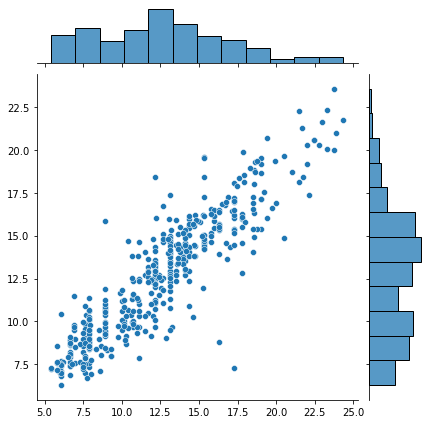

In [169]:
sb.jointplot(x = np.array(Y_test)[:,0] , y = np.array(Y_predict)[:,0])

# 10. Predict on test data with the tuned model

In [170]:
Y_predict_on_live_data = stack_reg_model.predict(x_ld_test)
Y_predict_on_live_data =  pd.DataFrame(data = Y_predict_on_live_data) 
Y_predict_on_live_data

,0
0,15.922204
1,16.189142
2,10.241860
3,6.605817
4,13.716180
...,...
295,14.482477
296,10.132758
297,14.665268
298,17.443367
